In [1]:
import numpy as np
import pandas as pd
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.text import tokenizer_from_json

sequence_length = 13
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/model_llm.keras"
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/texts_test.csv"
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/tokenizer_config.json"
# /content/drive/MyDrive/metar/LECOmodel_llm.keras
#/content/drive/MyDrive/metar/LECOtokenizer_config.json
#/content/drive/MyDrive/Colab Notebooks/gpt/LECO/texts_test.csv

model_path = "/content/drive/MyDrive/Colab Notebooks/gpt/i+d/model_ml.keras"
texts_test_path = "/content/drive/MyDrive/Colab Notebooks/gpt/i+d/texts_testml.csv"
tokenizer_path = "/content/drive/MyDrive/Colab Notebooks/gpt/i+d/tokenizerml.json"
result_path = "/content/drive/MyDrive/Colab Notebooks/gpt/i+d/resultml.csv"

model = load_model(model_path)
texts_test = pd.read_csv(texts_test_path, index_col="time").squeeze()

# Load the JSON configuration from the file
with open(tokenizer_path, 'r', encoding='utf-8') as f:
    tokenizer_json = json.load(f)

# Rebuild tokenizer from the JSON configuration
tokenizer = tokenizer_from_json(tokenizer_json)

In [2]:
#@title Get: X test, Y test and y_pred

sample = 300

# Function to generate text
def generate_text(seed_text, next_words=6):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
        predicted_probs = model.predict(token_list,verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]
        predicted_word = tokenizer.index_word[predicted_index]
        seed_text += " " + predicted_word
    return seed_text

def get_first_n_words(text, n):
    # Split the string into words
    words = text.split()
    # Join the first n words back into a string
    return ' '.join(words[:n])

def delete_first_n_words(text, n):
    # Split the string into words
    words = text.split()
    # Remove the first n words
    del words[:n]
    # Join the remaining words back into a string
    return ' '.join(words)

def delete_words_beyond_nosig(input_string):
    # Split the string into words
    words = input_string.split()
    # Find the index of "nosig" if it exists
    try:
        index_nosig = words.index("nosig")
    except ValueError:
        # If "nosig" is not found, return the original string
        return input_string
    # Keep only the words before "nosig"
    return ' '.join(words[:index_nosig + 1])


text_test = texts_test.sample(sample)

#texts_test.to_csv("/content/drive/MyDrive/Colab Notebooks/gpt/Levx/texts_test")

all_for_text = []
y_test = []
y_pred = []

for i in range(len(text_test)):
  all_for_text.append(generate_text(get_first_n_words(text_test[i],8),11))
  y_test.append(delete_first_n_words(text_test[i], 8))
  y_pred.append(delete_words_beyond_nosig(delete_first_n_words(all_for_text[i], 8)))

result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"all":all_for_text})
result.index=text_test.index
result.to_csv(result_path)
result
for ind in range(0,len(result)):
  display(result.iloc[ind]["y_test"])
  display(result.iloc[ind]["y_pred"])
  display(result.iloc[ind]["all"])
  #display(result.iloc[ind]["all"])
  print("*********")

'21012G23KT 180V260 9999 SCT011 SCT020 BKN035 08/06 Q1010 TEMPO 3000 RA'

'19013kt 9999 ra sct015 bkn028 07 05 q1010 nosig'

'20017kt 9999 WM SCT015 SCT 07 05 q1010 19013kt 9999 ra sct015 bkn028 07 05 q1010 nosig ra bkn010'

*********


'03004KT 350V090 CAVOK 22/17 Q1017 NOSIG'

'09005kt 010v160 cavok 23 17 q1018 nosig'

'05007kt 9999 WM MNClD M 23 17 q1018 09005kt 010v160 cavok 23 17 q1018 nosig bkn007 17 16 q1020'

*********


'06004KT 010V120 9000 NSC 19/17 Q1020 NOSIG'

'05003kt 010v100 9999 vcfg nsc 17 16 q1021 nosig'

'03009kt 9999 WM NSCNClD M 18 16 q1020 05003kt 010v100 9999 vcfg nsc 17 16 q1021 nosig sct005 q1019'

*********


'16005KT 3500 0500NE BCFG SCT001 13/12 Q1022 NOSIG'

'00000kt cavok 12 11 q1021 nosig'

'14003kt 5000 FG MNClD M 12 10 q1021 00000kt cavok 12 11 q1021 nosig sct015 13 11 q1022 tempo'

*********


'00000KT 9999 FEW020 06/05 Q1010 NOSIG'

'00000kt 9999 few020 04 04 q1009 nosig'

'07003kt 9999 FG FEW025 M 06 05 q1009 00000kt 9999 few020 04 04 q1009 nosig few040 07 05 6000'

*********


'VRB02KT 9999 SCT030 BKN045 09/07 Q1003 NOSIG'

'09004kt 050v130 9999 sct025 bkn045 09 06 q1002 tempo 3000 shra'

'06007kt 9999 WM SCT030 BKN 09 07 q1003 09004kt 050v130 9999 sct025 bkn045 09 06 q1002 tempo 3000 shra'

*********


'VRB02KT CAVOK 14/08 Q1012 NOSIG'

'14004kt cavok 14 09 q1013 nosig'

'10005kt 9999 WM MNClD M 13 09 q1013 14004kt cavok 14 09 q1013 nosig q1012 nosig bcfg few028 12'

*********


'03013KT 350V080 9999 FEW015 23/14 Q1024 NOSIG'

'03014g24kt 350v080 9999 few012 23 14 q1024 nosig'

'02019kt 9999 WM FEW015 M 22 14 q1024 03014g24kt 350v080 9999 few012 23 14 q1024 nosig few015 14 12'

*********


'10002KT CAVOK 09/06 Q1025 NOSIG'

'14002kt cavok 09 03 q1025 nosig'

'10005kt 9999 WM MNClD M 08 03 q1025 14002kt cavok 09 03 q1025 nosig q1025 nosig q1024 8000 bcfg'

*********


'05005KT 360V090 CAVOK 07/03 Q1024 NOSIG'

'05003kt 010v090 cavok 08 04 q1025 nosig'

'03011kt 9999 WM MNClD M 07 03 q1025 05003kt 010v090 cavok 08 04 q1025 nosig all rwy nosig all'

*********


'19008KT 150V230 3000 R17/P2000 R35/0750D BCFG BKN003 OVC005 12/12 Q1012 TEMPO BR BKN005'

'21008kt 170v240 9999 ra bkn006 bkn013 13 13 q1013 nosig'

'22015kt 9999 RA BKN005 BKN 12 11 q1013 21008kt 170v240 9999 ra bkn006 bkn013 13 13 q1013 nosig ra'

*********


'08005KT 030V150 CAVOK 16/14 Q1022 NOSIG'

'vrb02kt cavok 15 14 q1022 nosig'

'02007kt 9999 WM MNClD M 16 13 q1022 vrb02kt cavok 15 14 q1022 nosig q1023 nosig 1200d vcfg 020v160'

*********


'04004KT 360V090 9999 FEW003 15/14 Q1020 NOSIG'

'vrb02kt cavok 14 13 q1020 nosig'

'02007kt 9999 WM M005 M 15 14 q1020 vrb02kt cavok 14 13 q1020 nosig bkn010 bkn013 ovc045 13 12'

*********


'10007KT 060V150 CAVOK 13/04 Q1019 NOSIG'

'06005kt 010v160 cavok 13 05 q1019 nosig'

'08011kt 9999 WM MNClD M 13 06 q1019 06005kt 010v160 cavok 13 05 q1019 nosig bkn030 17 14 q1022'

*********


'07003KT 300V100 9999 SCT042 10/07 Q1018 NOSIG'

'06005kt 020v110 cavok 10 08 q1018 nosig'

'08009kt 9999 WM NSC045 M 10 08 q1018 06005kt 020v110 cavok 10 08 q1018 nosig bkn022 bkn033 15 10'

*********


'VRB01KT 9999 VCFG NSC 08/08 Q1020 NOSIG'

'11004kt 080v140 9999 few020 11 07 q1021 nosig'

'09007kt 9999 WM NSCNClD M 11 07 q1021 11004kt 080v140 9999 few020 11 07 q1021 nosig q1020 nosig few030cb'

*********


'13003KT 060V190 2500 BCFG -DZ SCT002 OVC007 07/07 Q1025 NOSIG'

'16005kt 110v190 4000 1200s br vv001 08 08 q1025 tempo 0800'

'19007kt 3000 DZ SCT005 BKN 08 07 q1025 16005kt 110v190 4000 1200s br vv001 08 08 q1025 tempo 0800'

*********


'27010KT 220V320 5000 RA SCT007 BKN011 BKN023 09/09 Q1013 TEMPO 3000 RA BKN010'

'21008kt 180v240 9999 ra sct010 bkn022 ovc032 09 09 q1012 tempo'

'20017kt 3000 RA SCT010 BKN 09 09 q1012 21008kt 180v240 9999 ra sct010 bkn022 ovc032 09 09 q1012 tempo'

*********


'21012G24KT 170V250 9999 -DZ VCFG BKN006 OVC012 12/11 Q1022 TEMPO 3000 BCFG BKN003'

'20009kt 170v230 9999 dz sct014 ovc017 11 10 q1021 nosig'

'20017kt 9999 DZ BKN010 OVC 12 10 q1021 20009kt 170v230 9999 dz sct014 ovc017 11 10 q1021 nosig ra'

*********


'03012KT 340V070 9999 FEW040 11/04 Q1033 NOSIG'

'02011kt 350v060 9999 few035 12 04 q1034 nosig'

'01015kt 9999 WM FEW040 M 11 05 q1033 02011kt 350v060 9999 few035 12 04 q1034 nosig all rwy nosig'

*********


'33005KT 290V010 9999 FEW030 21/16 Q1019 NOSIG'

'35009kt 320v050 9999 few030 23 17 q1019 nosig'

'36009kt 9999 WM FEW030 M 22 17 q1019 35009kt 320v050 9999 few030 23 17 q1019 nosig bkn015 bkn024 ovc042'

*********


'01009G21KT 320V050 9999 FEW008 BKN019 FEW025TCU 06/05 Q1010 TEMPO 3000 SHRA SCT025TCU'

'01011kt 9999 few010 sct035 05 03 q1009 nosig'

'35019kt 9999 WM FEW015 SCT 06 04 q1010 01011kt 9999 few010 sct035 05 03 q1009 nosig bkn020 06 3000'

*********


'03009KT 010V070 5000 2000SE BCFG SCT001 15/15 Q1022 TEMPO 3000 BR BKN003'

'04006kt 350v070 9999 bkn004 16 15 q1023 tempo 3000 dz bkn005'

'04009kt 9999 WM BKN005 M 16 15 q1022 04006kt 350v070 9999 bkn004 16 15 q1023 tempo 3000 dz bkn005'

*********


'27004KT 200V320 8000 -DZ SCT005 BKN011 OVC018 09/08 Q1021 TEMPO 3000 BCFG'

'29005kt 260v320 5000 dz sct010 ovc014 08 08 q1021 tempo 3000'

'30011kt 9999 DZ SCT005 BKN 08 08 q1022 29005kt 260v320 5000 dz sct010 ovc014 08 08 q1021 tempo 3000'

*********


'20008KT 170V250 9999 BKN015 12/10 Q1019 TEMPO 3000 RA BKN010'

'22007kt 180v280 9999 bkn018 ovc026 13 11 q1019 nosig'

'21015kt 9999 WM BKN020 M 12 11 q1019 22007kt 180v280 9999 bkn018 ovc026 13 11 q1019 nosig all rwy'

*********


'29012G23KT 250V330 9999 -RA SCT008 BKN014 BKN024 10/09 Q1013 TEMPO RA'

'25006kt 200v320 9999 sct005 bkn010 ovc018 11 10 q1012 tempo 3000'

'25015kt 9999 RA SCT010 BKN 11 09 q1013 25006kt 200v320 9999 sct005 bkn010 ovc018 11 10 q1012 tempo 3000'

*********


'01007KT 310V100 CAVOK 20/11 Q1024 NOSIG'

'03005kt 320v100 cavok 22 10 q1023 nosig'

'03009kt 9999 WM MNClD M 21 09 q1023 03005kt 320v100 cavok 22 10 q1023 nosig q1023 nosig bkn015 bkn032'

*********


'VRB04KT 9999 VCFG FEW006 OVC012 15/14 Q1021 NOSIG'

'02007kt 340v050 6000 3000n bcfg sct003 sct010 14 13 q1020 tempo'

'03009kt 9999 FG SCT005 M 14 13 q1020 02007kt 340v050 6000 3000n bcfg sct003 sct010 14 13 q1020 tempo'

*********


'00000KT 9999 4000S BCFG FEW001 02/00 Q1021 NOSIG'

'16004kt 9999 bcfg nsc 08 03 q1021 nosig'

'24001kt 9999 FG NSCNClD M 07 03 q1021 16004kt 9999 bcfg nsc 08 03 q1021 nosig q1021 tempo 3000'

*********


'25007KT 200V290 9999 FEW025 29/15 Q1011 NOSIG'

'22003kt 180v300 9999 few030 28 16 q1011 nosig'

'24007kt 9999 WM FEW030 M 29 15 q1011 22003kt 180v300 9999 few030 28 16 q1011 nosig sct033 15 13'

*********


'24009KT 190V290 9999 -RA SCT008 BKN014 BKN025 10/09 Q1015 TEMPO BKN010'

'22007kt 190v270 9999 ra few008 bkn018 13 10 q1015 tempo 3000'

'21011kt 9999 RA SCT010 BKN 12 09 q1015 22007kt 190v270 9999 ra few008 bkn018 13 10 q1015 tempo 3000'

*********


'28004KT 230V310 5000 BR BKN003 BKN008 OVC015 15/15 Q1017 TEMPO 3000 BCFG'

'36003kt 310v050 7000 bkn006 ovc010 17 16 q1017 nosig'

'33011kt 9999 BR BKN005 BKN 16 14 q1017 36003kt 310v050 7000 bkn006 ovc010 17 16 q1017 nosig q1017 tempo'

*********


'06007KT 020V120 9999 BKN014 16/14 Q1027 NOSIG'

'05010kt 010v100 9999 bkn012 16 13 q1027 nosig'

'04009kt 9999 WM BKN015 M 15 13 q1027 05010kt 010v100 9999 bkn012 16 13 q1027 nosig sct005 bkn020 few030tcu'

*********


'09003KT 030V140 CAVOK 13/05 Q1012 NOSIG'

'04004kt 320v110 9999 few040 11 09 q1013 nosig'

'03007kt 9999 WM M040 M 12 07 q1013 04004kt 320v110 9999 few040 11 09 q1013 nosig all rwy nosig'

*********


'32011G23KT 270V350 9999 -SHRA SCT016 FEW024TCU BKN035 06/05 Q1015 NOSIG'

'29007kt 240v340 9999 few018 few025tcu sct030 07 06 q1014 tempo shra'

'27013kt 9999 WM FEW020 FEW 07 06 q1014 29007kt 240v340 9999 few018 few025tcu sct030 07 06 q1014 tempo shra'

*********


'27003KT 210V330 9999 FEW021 SCT030 BKN043 07/06 Q1014 TEMPO SHRA SCT025TCU'

'25003kt 220v290 9999 few020 sct035 07 05 q1013 tempo shra sct020tcu'

'26009kt 9999 WM FEW025 SCT 06 05 q1014 25003kt 220v290 9999 few020 sct035 07 05 q1013 tempo shra sct020tcu'

*********


'VRB01KT 7000 SCT004 07/07 Q1019 NOSIG'

'vrb01kt 0800 r17 0900d r35 0250n fg vv001 08 08 q1019'

'01005kt 9999 BR OVC005 M 08 06 q1019 vrb01kt 0800 r17 0900d r35 0250n fg vv001 08 08 q1019'

*********


'05015G25KT 010V100 CAVOK 23/06 Q1019 NOSIG'

'11005kt 070v170 cavok 22 16 q1018 nosig'

'04019kt 9999 WM MNClD M 22 07 q1019 11005kt 070v170 cavok 22 16 q1018 nosig q1017 nosig sct004 bkn021'

*********


'35010KT 310V050 9999 FEW036 26/19 Q1016 NOSIG'

'36010kt 310v050 9999 few020 27 19 q1016 nosig'

'35013kt 9999 WM FEW040 M 25 18 q1016 36010kt 310v050 9999 few020 27 19 q1016 nosig tsra 270v010 8000'

*********


'VRB01KT 2200 BCFG FEW002 OVC006 10/10 Q1032 NOSIG'

'13005kt 100v210 3000 1000s bcfg few001 ovc036 11 11 q1031 tempo'

'20003kt 3000 FG FEW005 OVC 11 10 q1031 13005kt 100v210 3000 1000s bcfg few001 ovc036 11 11 q1031 tempo'

*********


'00000KT 0300 R17/0350N R35/0650D FG VV001 13/13 Q1017 NOSIG'

'vrb01kt 0400 r17 0650d r35 0500n fg vv001 13 13 q1017'

'03003kt 800 FG VV005 M 13 13 q1016 vrb01kt 0400 r17 0650d r35 0500n fg vv001 13 13 q1017'

*********


'19006KT 9999 FEW006 BKN010 BKN030 12/11 Q1017 TEMPO RA'

'18003kt 120v210 9999 few006 bkn008 11 10 q1015 tempo 3000 br'

'19005kt 9999 FG FEW010 BKN 11 11 q1016 18003kt 120v210 9999 few006 bkn008 11 10 q1015 tempo 3000 br'

*********


'VRB01KT 9999 BCFG FEW045 04/03 Q1027 TEMPO 3000 BR'

'vrb01kt 9999 few045 05 04 q1027 nosig'

'02003kt 9999 FG FEW050 M 04 04 q1027 vrb01kt 9999 few045 05 04 q1027 nosig all rwy tempo 3000'

*********


'VRB02KT 9999 VCFG FEW006 SCT040 14/11 Q1021 NOSIG'

'14003kt 110v200 9999 few007 sct020 14 12 q1021 nosig'

'28001kt 9999 WM FEW010 SCT 14 10 q1021 14003kt 110v200 9999 few007 sct020 14 12 q1021 nosig bkn020 sct030tcu'

*********


'34008KT 310V010 9999 BKN012 18/16 Q1016 NOSIG'

'36006kt 9999 few015 17 16 q1015 nosig'

'00011kt 9999 WM FEW015 M 19 16 q1015 36006kt 9999 few015 17 16 q1015 nosig few010 17 17 q1015'

*********


'VRB01KT 9999 VCFG FEW009 15/14 Q1012 NOSIG'

'13005kt 9999 1500w bcfg few004 15 15 q1011 nosig'

'15003kt 9999 FG FEW005 M 15 14 q1011 13005kt 9999 1500w bcfg few004 15 15 q1011 nosig ra sct025tcu'

*********


'21009KT 170V280 9999 FEW010 BKN029 08/06 Q1021 NOSIG'

'24006kt 190v290 9999 bkn012 08 05 q1022 nosig'

'21013kt 9999 WM BKN015 BKN 07 06 q1021 24006kt 190v290 9999 bkn012 08 05 q1022 nosig bkn020 11 4000'

*********


'VRB02KT CAVOK 08/03 Q1031 NOSIG'

'vrb01kt cavok 07 05 q1031 nosig'

'09003kt 9999 WM MNClD M 08 04 q1031 vrb01kt cavok 07 05 q1031 nosig sct020 bkn032 04 04 q1031'

*********


'29005KT 260V330 7000 2500E -RA FEW003 BKN009 BKN018 09/09 Q1022 TEMPO 3000 DZ'

'30005kt 250v340 9999 ra sct016 bkn028 09 08 q1021 tempo 3000'

'28011kt 9999 RA SCT005 BKN 09 08 q1022 30005kt 250v340 9999 ra sct016 bkn028 09 08 q1021 tempo 3000'

*********


'VRB02KT CAVOK 02/M01 Q1032 NOSIG'

'09004kt 030v140 cavok 02 m01 q1033 nosig'

'07005kt 9999 WM MNClD M 01 -1 q1032 09004kt 030v140 cavok 02 m01 q1033 nosig ra bcfg few005 sct025'

*********


'29003KT 230V340 9999 FEW003 BKN025 13/10 Q1027 NOSIG'

'vrb02kt 9999 dz few007 bkn012 12 11 q1028 nosig'

'25007kt 9999 DZ FEW010 BKN 12 11 q1028 vrb02kt 9999 dz few007 bkn012 12 11 q1028 nosig vcfg nosig'

*********


'10004KT 060V130 9999 BKN017 05/04 Q1023 NOSIG'

'03006kt 9999 sct020 04 02 q1023 nosig'

'03005kt 9999 WM BKN020 M 04 03 q1023 03006kt 9999 sct020 04 02 q1023 nosig few040 12 05 q1024'

*********


'26003KT 230V310 8000 2500N SCT001 BKN040 06/06 Q0997 TEMPO 0800 BCFG'

'vrb01kt 9999 sct003 bkn009 bkn037 06 06 q0996 rera nosig'

'27007kt 9999 WM SCT005 BKN 06 06 q0997 vrb01kt 9999 sct003 bkn009 bkn037 06 06 q0996 rera nosig ra'

*********


'VRB02KT 9999 FEW010 21/18 Q1016 NOSIG'

'vrb02kt 9999 few010 22 18 q1015 nosig'

'27003kt 9999 WM FEW015 M 22 17 q1015 vrb02kt 9999 few010 22 18 q1015 nosig few010 17 17 q1015'

*********


'14006KT 110V170 1500 -RA BCFG BKN002 BKN008 08/07 Q1013 TEMPO 0800 BCFG BKN001'

'20010kt 170v240 9999 ra bkn008 bkn018 09 09 q1014 ws all'

'20009kt 9999 RA BKN010 BKN 09 06 q1014 20010kt 170v240 9999 ra bkn008 bkn018 09 09 q1014 ws all'

*********


'01005KT 9999 FEW020 11/09 Q1023 NOSIG'

'vrb02kt 9999 few030 12 09 q1023 nosig'

'32007kt 9999 WM FEW030 M 11 09 q1023 vrb02kt 9999 few030 12 09 q1023 nosig few005 ovc017 11 11'

*********


'31007KT 270V350 9999 SCT022 FEW026TCU SCT040 08/06 Q1014 TEMPO SHRA'

'3500e 170v240 9999 sct020 few030tcu 08 05 q1014 tempo shra sct030tcu'

'31015kt 9999 WM SCT025 FEW 08 05 q1014 3500e 170v240 9999 sct020 few030tcu 08 05 q1014 tempo shra sct030tcu'

*********


'15010KT 130V190 2700 RA SCT004 BKN012 OVC020 11/11 Q1002 TEMPO 1400 RA BKN005'

'21020g34kt 190v280 3000 ra bkn006 bkn010 13 13 q1002 tempo 1500'

'19019kt 3000 RA SCT010 BKN 13 12 q1002 21020g34kt 190v280 3000 ra bkn006 bkn010 13 13 q1002 tempo 1500'

*********


'29005KT 250V330 9999 -RA SCT026 BKN040 BKN048 08/07 Q0996 TEMPO 3000 RA BKN010'

'vrb02kt 7000 3000n radz sct002 bkn005 bkn011 08 08 q0995 tempo'

'28005kt 9999 RA SCT005 SCT 07 07 q0996 vrb02kt 7000 3000n radz sct002 bkn005 bkn011 08 08 q0995 tempo'

*********


'03011KT 340V050 9999 VCSH FEW018 FEW022TCU SCT030 08/04 Q1013 TEMPO SHRA'

'32009kt 9999 sct018 few024tcu sct040 13 03 q1013 tempo shra sct020tcu'

'32019kt 9999 WM SCT020 FEW 09 03 q1013 32009kt 9999 sct018 few024tcu sct040 13 03 q1013 tempo shra sct020tcu'

*********


'28005KT 230V320 9999 FEW016 SCT028 13/09 Q1016 NOSIG'

'vrb02kt 9999 few020 bkn039 12 09 q1017 nosig'

'26009kt 9999 WM FEW025 SCT 12 08 q1017 vrb02kt 9999 few020 bkn039 12 09 q1017 nosig sct033 few035tcu 19'

*********


'28007KT 240V330 9999 FEW020 SCT030TCU 06/05 Q1020 TEMPO 3000 SHRA SCT020TCU'

'29007kt 250v320 9999 few023tcu sct035 07 03 q1020 nosig'

'28017kt 9999 WM FEW025 SCT 06 04 q1020 29007kt 250v320 9999 few023tcu sct035 07 03 q1020 nosig few030tcu bkn035'

*********


'VRB02KT 9999 FEW002 SCT048 14/13 Q1017 NOSIG'

'00000kt 9999 few012 bkn018 14 14 q1017 nosig'

'14001kt 9999 WM FEW015 BKN 14 13 q1017 00000kt 9999 few012 bkn018 14 14 q1017 nosig sct033 18 15'

*********


'23004KT 180V280 CAVOK 15/08 Q1019 NOSIG'

'20014kt 160v240 cavok 14 07 q1019 nosig'

'20019kt 9999 WM MNClD M 13 08 q1019 20014kt 160v240 cavok 14 07 q1019 nosig bkn030 17 09 q1019'

*********


'35007KT 320V030 9999 FEW009 SCT014 BKN022 09/08 Q1021 TEMPO 3000 RA BKN010'

'35009kt 320v030 9999 few012 sct022 08 07 q1021 nosig'

'35017kt 9999 WM FEW015 SCT 08 07 q1021 35009kt 320v030 9999 few012 sct022 08 07 q1021 nosig few030tcu 17'

*********


'02007KT 340V050 9999 FEW038 BKN045 13/07 Q1021 NOSIG'

'03010kt 350v070 9999 few038 14 07 q1022 nosig'

'02011kt 9999 WM FEW040 M 14 06 q1021 03010kt 350v070 9999 few038 14 07 q1022 nosig few025tcu sct035 10'

*********


'21006KT 160V240 5000 -RA SCT004 BKN012 BKN018 15/14 Q1015 TEMPO 2000 -RADZ BKN003'

'23008kt 190v280 7000 ra few003 ovc005 15 14 q1015 nosig'

'22013kt 9999 RA SCT005 OVC 15 14 q1015 23008kt 190v280 7000 ra few003 ovc005 15 14 q1015 nosig all'

*********


'VRB01KT CAVOK 07/04 Q1025 NOSIG'

'12002kt cavok 10 m01 q1027 nosig'

'09007kt 9999 WM MNClD M 10 05 q1026 12002kt cavok 10 m01 q1027 nosig all rwy tempo 3000 br'

*********


'34008KT 300V030 9999 FEW035 19/11 Q1017 NOSIG'

'35007kt 9999 few032 19 11 q1017 nosig'

'35013kt 9999 WM FEW035 M 17 12 q1017 35007kt 9999 few032 19 11 q1017 nosig all 17 17 q1016'

*********


'06011KT 010V120 9999 FEW032 19/12 Q1022 NOSIG'

'05011kt 010v090 9999 few032 21 13 q1022 nosig'

'03015kt 9999 WM FEW035 M 20 12 q1022 05011kt 010v090 9999 few032 21 13 q1022 nosig bkn030 bkn036 17'

*********


'04009KT 360V070 9999 SCT045 04/01 Q1020 NOSIG'

'04006kt 010v080 9999 sct040 02 m01 q1019 nosig'

'03011kt 9999 WM SCT040 M 03 00 q1019 04006kt 010v080 9999 sct040 02 m01 q1019 nosig all rwy nosig'

*********


'VRB02KT 9999 FEW012 22/16 Q1015 NOSIG'

'vrb02kt 9999 few014 23 15 q1015 nosig'

'11007kt 9999 WM FEW015 M 23 16 q1015 vrb02kt 9999 few014 23 15 q1015 nosig few010 17 15 q1015'

*********


'10004KT 030V150 CAVOK 13/06 Q1029 NOSIG'

'09004kt 010v140 cavok 14 07 q1029 nosig'

'05009kt 9999 WM MNClD M 13 07 q1029 09004kt 010v140 cavok 14 07 q1029 nosig sct015 08 06 q0998'

*********


'11005KT CAVOK 02/M00 Q1005 NOSIG'

'10005kt 050v140 cavok 02 m01 q1005 nosig'

'09007kt 9999 WM MNClD M 01 -1 q1005 10005kt 050v140 cavok 02 m01 q1005 nosig bkn033 07 m01 q1029'

*********


'10007KT 030V140 CAVOK 28/20 Q1017 NOSIG'

'10006kt 060v150 cavok 28 19 q1016 nosig'

'08009kt 9999 WM MNClD M 29 19 q1017 10006kt 060v150 cavok 28 19 q1016 nosig q1017 nosig all rwy'

*********


'05010KT 350V080 9999 FEW025 FEW030TCU 27/20 Q1020 NOSIG'

'vrb05kt 9999 few030 26 20 q1020 nosig'

'06011kt 9999 WM FEW030 FEW 26 18 q1020 vrb05kt 9999 few030 26 20 q1020 nosig q1020 nosig sct015 bkn026'

*********


'20006KT 160V240 7000 -RA BKN005 OVC011 13/13 Q1014 NOSIG'

'22010kt 170v280 9999 ra bkn004 ovc007 13 13 q1013 nosig'

'20007kt 9999 RA BKN005 OVC 13 12 q1014 22010kt 170v280 9999 ra bkn004 ovc007 13 13 q1013 nosig q1008'

*********


'VRB03KT 9999 FEW030 SCT049 21/12 Q1018 NOSIG'

'vrb02kt 9999 few020 sct040 20 13 q1018 nosig'

'26005kt 9999 WM FEW030 SCT 20 13 q1018 vrb02kt 9999 few020 sct040 20 13 q1018 nosig 36003kt 290v060 15'

*********


'33005KT 290V010 9999 SCT018 BKN045 11/08 Q1017 NOSIG'

'00000kt 9999 few018 sct024 13 10 q1018 nosig'

'27003kt 9999 WM SCT020 SCT 12 08 q1018 00000kt 9999 few018 sct024 13 10 q1018 nosig few020 sct035tcu bkn035'

*********


'24003KT 210V270 8000 SCT002 BKN004 14/14 Q1011 NOSIG'

'14003kt 110v170 4000 bcfg sct001 sct004 bkn006 13 13 q1012 nosig'

'22005kt 5000 FG SCT005 BKN 13 13 q1012 14003kt 110v170 4000 bcfg sct001 sct004 bkn006 13 13 q1012 nosig'

*********


'36005KT 320V050 9999 FEW045 27/16 Q1018 NOSIG'

'35005kt 290v050 cavok 28 17 q1017 nosig'

'36009kt 9999 WM FEWNClD M 27 15 q1017 35005kt 290v050 cavok 28 17 q1017 nosig few030tcu bkn037 29 bkn013'

*********


'24006KT 160V280 9999 SCT016 BKN030 12/09 Q1029 BECMG BKN010'

'20004kt 150v290 9999 sct010 bkn021 12 11 q1029 nosig'

'22013kt 9999 WM SCT015 BKN 12 09 q1029 20004kt 150v290 9999 sct010 bkn021 12 11 q1029 nosig bkn020 sct040tcu'

*********


'23007KT 200V270 9999 SCT007 SCT011 BKN016 13/12 Q1013 NOSIG'

'26006kt 210v310 9999 sct008 sct014 13 11 q1013 nosig'

'23013kt 9999 WM SCT010 SCT 13 11 q1013 26006kt 210v310 9999 sct008 sct014 13 11 q1013 nosig all rwy'

*********


'20010KT 170V240 4000 RA FEW007 OVC012 12/11 Q1008 TEMPO 1500 RA'

'24009kt 180v300 9999 ra few008 bkn016 11 10 q1009 tempo 3000'

'22015kt 5000 RA FEW010 BKN 11 11 q1008 24009kt 180v300 9999 ra few008 bkn016 11 10 q1009 tempo 3000'

*********


'06005KT 010V110 CAVOK 12/08 Q1023 NOSIG'

'06005kt 010v120 cavok 11 07 q1023 nosig'

'04009kt 9999 WM MNClD M 11 06 q1023 06005kt 010v120 cavok 11 07 q1023 nosig q1023 nosig sct030 sct030'

*********


'04011KT 350V080 9999 FEW012 SCT032 05/M01 Q1015 NOSIG'

'04013kt 010v070 9999 few010 sct032 04 m03 q1016 nosig'

'02023kt 9999 WM FEW015 SCT 05 -1 q1016 04013kt 010v070 9999 few010 sct032 04 m03 q1016 nosig all rwy'

*********


'36012KT 9999 SCT014 SCT026 20/17 Q1017 NOSIG'

'02008kt 330v080 9999 4000n bcfg few010 16 14 q1017 nosig'

'01013kt 9999 WM SCT015 M 20 16 q1017 02008kt 330v080 9999 4000n bcfg few010 16 14 q1017 nosig sct015'

*********


'VRB02KT CAVOK 05/04 Q1014 NOSIG'

'11006kt 080v140 cavok 09 04 q1013 nosig'

'06009kt 9999 WM MNClD M 08 04 q1013 11006kt 080v140 cavok 09 04 q1013 nosig sct030 sct044 14 10'

*********


'34005KT 310V030 9999 4000S BCFG FEW003 13/11 Q1024 TEMPO 3000 BR BKN005'

'vrb02kt 9999 bcfg few005 bkn006 bkn025 13 13 q1024 tempo 3000'

'23003kt 9999 FG FEW005 BKN 13 12 q1024 vrb02kt 9999 bcfg few005 bkn006 bkn025 13 13 q1024 tempo 3000'

*********


'04006KT 010V070 9999 BKN007 16/14 Q1022 NOSIG'

'07003kt 020v110 9999 bkn009 15 13 q1022 nosig'

'04007kt 9999 FG BKN010 M 14 13 q1022 07003kt 020v110 9999 bkn009 15 13 q1022 nosig sct010 bkn013 sct030tcu'

*********


'21005KT 180V240 2000 -DZ BCFG OVC002 12/12 Q1023 TEMPO 6000'

'21007kt 170v250 3000 dz bkn002 bkn006 10 10 q1023 tempo 0800'

'19009kt 3000 DZ BKN005 M 11 11 q1023 21007kt 170v250 3000 dz bkn002 bkn006 10 10 q1023 tempo 0800'

*********


'27003KT 210V300 3000 1200N BCFG VV002 17/17 Q1018 TEMPO 0800 BCFG'

'22005kt 190v250 2000 r35 1400d bcfg vv001 17 17 q1017 nosig'

'23007kt 3000 FG VV005 M 17 16 q1018 22005kt 190v250 2000 r35 1400d bcfg vv001 17 17 q1017 nosig'

*********


'12004KT 100V170 4500 1000E -SHRA TS VCFG FEW001 FEW032CB 15/15 Q1009 NOSIG'

'vrb01kt 9999 tsra sct038 26 14 q1011 q1009 few007 bkn012 sct018tcu'

'15003kt 5000 RA FEW040 SCT 15 14 q1009 vrb01kt 9999 tsra sct038 26 14 q1011 q1009 few007 bkn012 sct018tcu'

*********


'36004KT 9999 FEW018 BKN028 12/11 Q1029 TEMPO BKN012'

'36003kt 300v060 9999 few012 13 10 q1029 nosig'

'00007kt 9999 WM FEWNClD M 12 11 q1029 36003kt 300v060 9999 few012 13 10 q1029 nosig bkn010 bkn014 sct030tcu'

*********


'10003KT 040V140 9999 SCT015 09/07 Q1029 NOSIG'

'06003kt 020v120 9999 sct012 07 07 q1029 nosig'

'03005kt 9999 WM SCT015 M 07 06 q1029 06003kt 020v120 9999 sct012 07 07 q1029 nosig few009 08 9999'

*********


'01009KT 340V040 3000 -DZ BCFG BKN003 BKN011 17/17 Q1019 TEMPO 0800'

'35007kt 330v030 9999 bkn007 bkn013 17 16 q1019 nosig'

'00013kt 9999 WM OVC010 BKN 17 16 q1019 35007kt 330v030 9999 bkn007 bkn013 17 16 q1019 nosig bkn020 18'

*********


'23012KT 180V290 9999 SCT028 21/14 Q1007 NOSIG'

'23012kt 190v290 9999 few028 21 13 q1007 nosig'

'22019kt 9999 WM FEW030 M 20 12 q1008 23012kt 190v290 9999 few028 21 13 q1007 nosig bkn010 bkn020 bkn026'

*********


'10003KT 050V160 CAVOK 01/M00 Q1033 NOSIG'

'09004kt 060v120 cavok 02 m00 q1033 nosig'

'06005kt 9999 WM MNClD M 02 -1 q1033 09004kt 060v120 cavok 02 m00 q1033 nosig sct008 350v120 5000 few005'

*********


'23004KT 190V300 4000 BR BKN002 BKN006 BKN013 15/14 Q1025 TEMPO 1500 BCFG'

'23006kt 170v280 5000 br bkn004 bkn009 15 15 q1023 tempo 3000'

'23009kt 5000 BR BKN005 BKN 15 15 q1024 23006kt 170v280 5000 br bkn004 bkn009 15 15 q1023 tempo 3000'

*********


'06005KT 350V130 9999 FEW030 24/19 Q1020 NOSIG'

'13005kt 9999 few030 24 18 q1020 nosig'

'08009kt 9999 WM FEW030 M 24 18 q1020 13005kt 9999 few030 24 18 q1020 nosig q1021 nosig bkn010 bkn026'

*********


'19008KT 160V230 6000 -RA SCT008 BKN014 10/09 Q1018 TEMPO 3000 BKN010'

'20011kt 9999 ra few008 bkn012 11 09 q1018 nosig'

'19009kt 9999 RA SCT010 BKN 12 08 q1018 20011kt 9999 ra few008 bkn012 11 09 q1018 nosig all sct020tcu'

*********


'26001KT 9999 FEW010 BKN016 15/14 Q1018 NOSIG'

'32003kt 9999 few011 bkn018 14 14 q1018 tempo bkn005 bkn010 sct030tcu'

'32001kt 9999 WM FEW015 BKN 14 14 q1017 32003kt 9999 few011 bkn018 14 14 q1018 tempo bkn005 bkn010 sct030tcu'

*********


'22017G30KT 170V260 9000 -DZ BKN006 BKN010 12/11 Q1021 TEMPO 3000'

'1900u 9999 3000e dz bkn006 ovc012 12 11 q1020 tempo 3000'

'20025kt 9999 DZ BKN010 OVC 12 10 q1020 1900u 9999 3000e dz bkn006 ovc012 12 11 q1020 tempo 3000'

*********


'22011G24KT 190V280 9999 FEW018 SCT026 BKN033 11/08 Q1021 NOSIG'

'20015kt 170v230 9999 dz bkn006 ovc012 10 09 q1021 tempo 3000'

'20019kt 3000 DZ BKN020 BKN 10 09 q1021 20015kt 170v230 9999 dz bkn006 ovc012 10 09 q1021 tempo 3000'

*********


'VRB02KT 9999 SCT025 SCT035 20/14 Q1018 NOSIG'

'34007kt 300v020 9999 ra sct018 bkn045 19 15 q1018 nosig'

'30005kt 9999 WM SCT030 SCT 19 15 q1018 34007kt 300v020 9999 ra sct018 bkn045 19 15 q1018 nosig all'

*********


'00000KT 0300 R17/0375N R35/0450N FG VV001 07/07 Q1018 NOSIG'

'13004kt 0400 r17 0300n r35 0500n fg vv001 08 08 q1019'

'11005kt 800 FG VV005 M 07 07 q1018 13004kt 0400 r17 0300n r35 0500n fg vv001 08 08 q1019'

*********


'VRB04KT 9999 SCT018 SCT024TCU BKN040 08/06 Q1015 TEMPO SHRA'

'26004kt 210v320 9999 shra few018 sct025 sct032tcu bkn048 08 06 q1013'

'30005kt 9999 RA FEW020 SCT 07 05 q1014 26004kt 210v320 9999 shra few018 sct025 sct032tcu bkn048 08 06 q1013'

*********


'12007KT CAVOK 04/M02 Q1030 NOSIG'

'14003kt cavok 05 02 q1029 nosig'

'10009kt 9999 WM MNClD M 04 -3 q1030 14003kt cavok 05 02 q1029 nosig q1030 nosig bcfg sct004 bkn008'

*********


'32006KT 240V340 9999 SCT026 12/07 Q1023 NOSIG'

'32004kt 260v010 9999 few025 sct035 11 07 q1023 nosig'

'30011kt 9999 WM FEW030 SCT 11 08 q1023 32004kt 260v010 9999 few025 sct035 11 07 q1023 nosig sct010 bkn013'

*********


'00000KT 9999 FEW011 10/09 Q1021 TEMPO 3000 BCFG'

'00000kt 9999 bcfg few001 10 10 q1021 nosig'

'02005kt 9999 FG FEW005 M 10 10 q1021 00000kt 9999 bcfg few001 10 10 q1021 nosig sct009 bkn016 sct021tcu'

*********


'20006KT 150V260 9999 FEW013 BKN028 16/12 Q1025 NOSIG'

'18007kt 150v210 9999 few010 bkn015 16 12 q1025 tempo 3000 ra'

'20011kt 9999 WM FEW015 BKN 16 11 q1025 18007kt 150v210 9999 few010 bkn015 16 12 q1025 tempo 3000 ra'

*********


'25012G22KT 200V290 5000 -DZRA BCFG BKN003 OVC008 17/16 Q1016 TEMPO 3000 RA'

'22008kt 190v270 3000 ra bkn003 bkn006 ovc012 17 16 q1016 tempo'

'23015kt 9999 RA BKN005 OVC 17 16 q1016 22008kt 190v270 3000 ra bkn003 bkn006 ovc012 17 16 q1016 tempo'

*********


'VRB02KT 0600 R17/0650N R35/0600N FG VV001 09/09 Q1015 TEMPO 0350'

'10005kt 9999 few007 09 08 q1015 nosig'

'08005kt 800 FG VV005 M 09 09 q1015 10005kt 9999 few007 09 08 q1015 nosig vv001 10 09 q1036'

*********


'06004KT 020V120 CAVOK 27/17 Q1018 NOSIG'

'vrb06kt cavok 25 17 q1019 nosig'

'09009kt 9999 WM MNClD M 28 17 q1018 vrb06kt cavok 25 17 q1019 nosig bkn033 15 17 q1018 nosig'

*********


'23012G25KT 180V280 9999 BKN006 BKN012 SCT020TCU 09/07 Q1003 TEMPO 3000 SHRA'

'27008g18kt 210v320 9999 ra bkn008 ovc009 10 08 q1002 tempo 3000'

'23015kt 9999 RA BKN010 BKN 08 07 q1004 27008g18kt 210v320 9999 ra bkn008 ovc009 10 08 q1002 tempo 3000'

*********


'VRB02KT 7000 NSC 17/16 Q1020 NOSIG'

'06003kt 020v120 9999 sct012 17 16 q1020 nosig'

'03009kt 9999 WM NSC010 M 17 16 q1020 06003kt 020v120 9999 sct012 17 16 q1020 nosig all rwy nosig'

*********


'03006KT 350V080 CAVOK 11/09 Q1020 NOSIG'

'03006kt 360v070 cavok 13 09 q1019 nosig'

'03011kt 9999 WM MNClD M 12 08 q1019 03006kt 360v070 cavok 13 09 q1019 nosig q1019 nosig 31007kt 270v350'

*********


'03010KT 350V060 9999 FEW009 SCT020 09/08 Q1014 TEMPO 3000 RA BR BKN005'

'02004kt 330v060 9999 few007 sct012 09 09 q1013 nosig'

'01007kt 9999 WM FEW010 SCT 09 08 q1013 02004kt 330v060 9999 few007 sct012 09 09 q1013 nosig sct030 sct045'

*********


'VRB03KT CAVOK 03/M02 Q1026 NOSIG'

'08005kt 030v150 cavok 02 m01 q1026 nosig'

'08009kt 9999 WM MNClD M 03 -1 q1026 08005kt 030v150 cavok 02 m01 q1026 nosig sct008 bkn012 ovc024 07'

*********


'04004KT 350V140 CAVOK 17/08 Q1025 NOSIG'

'04006kt 010v070 cavok 18 11 q1025 nosig'

'04009kt 9999 WM MNClD M 17 11 q1025 04006kt 010v070 cavok 18 11 q1025 nosig few005 bkn018 14 11'

*********


'VRB01KT 4000 BR SCT010 SCT025 08/08 Q1019 NOSIG'

'vrb02kt 4000 br few010 sct016 bkn036 11 09 q1019 nosig'

'32005kt 5000 BR FEW015 SCT 09 09 q1019 vrb02kt 4000 br few010 sct016 bkn036 11 09 q1019 nosig 33001kt'

*********


'VRB01KT 9000 FEW012 15/14 Q1017 NOSIG'

'20004kt 170v230 9999 few010 sct025 14 13 q1017 nosig'

'19003kt 9999 WM FEW005 M 14 13 q1017 20004kt 170v230 9999 few010 sct025 14 13 q1017 nosig bkn020 sct030tcu'

*********


'15011KT 110V190 9999 FEW009 SCT015 BKN035 11/08 Q0997 NOSIG'

'20012kt 9999 few025 sct035 09 07 q0997 tempo shra sct025tcu sct030'

'13009kt 9999 WM FEW030 BKN 10 07 q0997 20012kt 9999 few025 sct035 09 07 q0997 tempo shra sct025tcu sct030'

*********


'23006KT 200V290 3000 BCFG SCT002 BKN004 09/09 Q1016 NOSIG'

'23004kt 190v280 4000 br sct003 sct006 bkn020 09 08 q1017 tempo'

'23009kt 9999 FG SCT005 SCT 08 07 q1018 23004kt 190v280 4000 br sct003 sct006 bkn020 09 08 q1017 tempo'

*********


'03011KT 9999 BKN008 11/10 Q1016 NOSIG'

'02010kt 360v070 9999 bkn005 ovc010 11 10 q1017 nosig'

'01015kt 5000 DZ BKN005 OVC 10 10 q1016 02010kt 360v070 9999 bkn005 ovc010 11 10 q1017 nosig all 1900n'

*********


'01006KT 330V080 9999 FEW032 30/14 Q1016 NOSIG'

'04008kt 350v110 9999 few032tcu 29 13 q1016 nosig'

'03007kt 9999 WM FEW035 M 31 16 q1015 04008kt 350v110 9999 few032tcu 29 13 q1016 nosig all rwy nosig'

*********


'23016G28KT 190V280 9999 -DZ BKN009 BKN013 11/10 Q1019 NOSIG'

'22015g31kt 190v270 8000 dz bkn007 bkn013 11 10 q1019 nosig'

'21021kt 5000 DZ BKN010 BKN 11 09 q1018 22015g31kt 190v270 8000 dz bkn007 bkn013 11 10 q1019 nosig ra'

*********


'27005KT 200V330 9999 FEW004 SCT021 BKN045 16/16 Q1012 TEMPO 3000 RA'

'19006kt 160v230 9999 4000n few002 bkn010 ovc018 16 16 q1013 tempo'

'17005kt 9999 WM FEW005 SCT 15 15 q1013 19006kt 160v230 9999 4000n few002 bkn010 ovc018 16 16 q1013 tempo'

*********


'00000KT 0300 R17/P2000 R35/0325N FG VV001 15/14 Q1016 NOSIG'

'vrb01kt cavok 15 14 q1016 nosig'

'22005kt 9999 WM VVNClD M 16 15 q1016 vrb01kt cavok 15 14 q1016 nosig sct005 bkn034 20 15 q1016'

*********


'23007KT 180V270 9999 SCT034 20/14 Q1015 NOSIG'

'24007kt 190v290 9999 sct025 18 13 q1015 nosig'

'23011kt 9999 WM SCT030 M 18 13 q1015 24007kt 190v290 9999 sct025 18 13 q1015 nosig tsra tempo 3000'

*********


'36003KT 330V060 9999 FEW003 SCT006 BKN017 15/15 Q1019 NOSIG'

'00000kt 9999 few003 bkn048 17 15 q1020 nosig'

'01003kt 9999 FG FEW005 BKN 16 15 q1019 00000kt 9999 few003 bkn048 17 15 q1020 nosig bkn020 15 15'

*********


'13004KT 080V200 CAVOK 27/15 Q1019 NOSIG'

'17002kt 9999 few040 30 14 q1018 nosig'

'14005kt 9999 WM MNClD M 28 15 q1018 17002kt 9999 few040 30 14 q1018 nosig all rwy tempo 3000'

*********


'VRB01KT CAVOK 17/13 Q1010 NOSIG'

'vrb02kt cavok 19 13 q1010 nosig'

'21007kt 9999 WM MNClD M 18 13 q1011 vrb02kt cavok 19 13 q1010 nosig all rwy tempo 3000 shra'

*********


'26011KT 200V300 9999 SCT038 11/M00 Q1010 NOSIG'

'16003kt vrb03kt 9999 few036 12 m01 q1010 nosig'

'21009kt 9999 WM FEW040 M 11 00 q1010 16003kt vrb03kt 9999 few036 12 m01 q1010 nosig few035cb sct030 12'

*********


'26007KT 210V300 3000 -DZ BCFG VV001 11/11 Q1028 TEMPO 1000 BCFG'

'25004kt 210v300 2000 0800s bcfg bkn002 bkn005 10 10 q1028 tempo'

'25011kt 3000 DZ VV005 M 11 10 q1028 25004kt 210v300 2000 0800s bcfg bkn002 bkn005 10 10 q1028 tempo'

*********


'24009KT 200V300 9999 FEW022 SCT026 BKN037 20/15 Q1018 NOSIG'

'22010kt 190v280 9999 sct025 19 13 q1017 nosig'

'24013kt 9999 WM SCT025 SCT 18 15 q1018 22010kt 190v280 9999 sct025 19 13 q1017 nosig 30007kt 260v330 r35'

*********


'07005KT 020V120 CAVOK 29/15 Q1019 NOSIG'

'03006kt 340v070 cavok 29 15 q1019 nosig'

'07007kt 9999 WM MNClD M 29 14 q1019 03006kt 340v070 cavok 29 15 q1019 nosig q1019 nosig bkn014 170v270'

*********


'VRB01KT 9999 1800NW BCFG NSC 07/07 Q1014 TEMPO 3000 BR'

'34002kt 9999 vcfg nsc 08 08 q1015 tempo 0350 fg vv001'

'09005kt 9999 FG NSCNClD M 10 10 q1015 34002kt 9999 vcfg nsc 08 08 q1015 tempo 0350 fg vv001'

*********


'00000KT CAVOK 05/02 Q1028 NOSIG'

'00000kt cavok 04 01 q1028 nosig'

'03005kt 9999 WM MNClD M 06 03 q1028 00000kt cavok 04 01 q1028 nosig q1028 nosig q1030 tempo 3000'

*********


'18009KT 4000 RA BKN002 11/11 Q1017 TEMPO 1000'

'21004kt 160v260 4000 ra br vv001 12 12 q1017 nosig'

'20009kt 5000 RA VV005 M 11 11 q1017 21004kt 160v260 4000 ra br vv001 12 12 q1017 nosig all'

*********


'26006KT 200V330 0800 R17/1800D R35/1800U -DZ FG VV001 16/15 Q1024 TEMPO 3000 BR BKN005'

'vrb02kt 1200 270v350 2000 dz br bkn002 13 13 q1024 tempo'

'24011kt 1500 DZ VV005 M 16 15 q1024 vrb02kt 1200 270v350 2000 dz br bkn002 13 13 q1024 tempo'

*********


'00000KT CAVOK 09/08 Q1018 NOSIG'

'00000kt cavok 10 07 q1018 nosig'

'03005kt 9999 FG MNClD M 10 09 q1018 00000kt cavok 10 07 q1018 nosig all rwy tempo 3000 br'

*********


'03007KT 340V100 9999 FEW020 06/02 Q1020 NOSIG'

'01010kt 9999 few023 010v130 05 05 tempo 3000 br bkn010 06'

'05013kt 9999 RA FEW025 SCT 06 03 q1020 01010kt 9999 few023 010v130 05 05 tempo 3000 br bkn010 06'

*********


'VRB01KT 9999 VCFG FEW020 07/06 Q1015 NOSIG'

'00000kt 9999 vcfg few020 07 07 q1015 tempo 1500 bcfg bkn005'

'08005kt 9999 FG FEW025 M 07 06 q1015 00000kt 9999 vcfg few020 07 07 q1015 tempo 1500 bcfg bkn005'

*********


'09004KT 040V150 9999 FEW011 08/05 Q1021 NOSIG'

'10009kt 070v140 9999 few035 11 01 q1019 nosig'

'08007kt 9999 WM M040 M 09 03 q1020 10009kt 070v140 9999 few035 11 01 q1019 nosig sct036 180v280 7000'

*********


'29009KT 250V330 9999 SCT018 BKN046 11/08 Q1015 NOSIG'

'31007kt 270v350 9999 sct017 sct025 12 09 q1015 nosig'

'27013kt 9999 WM FEW020 SCT 11 08 q1015 31007kt 270v350 9999 sct017 sct025 12 09 q1015 nosig bkn020 14'

*********


'VRB02KT CAVOK 01/M00 Q1022 NOSIG'

'00000kt cavok 02 m00 q1023 nosig'

'07005kt 9999 WM MNClD M 02 00 q1022 00000kt cavok 02 m00 q1023 nosig q1023 nosig bcfg bkn002 ovc006'

*********


'06003KT 010V100 CAVOK 15/13 Q1016 NOSIG'

'05003kt cavok 12 11 q1013 nosig'

'05005kt 9999 WM MNClD M 13 13 q1015 05003kt cavok 12 11 q1013 nosig sct030 17 11 q1007 nosig'

*********


'25008KT 200V290 4000 DZ BCFG BKN002 OVC004 14/14 Q1030 TEMPO 2000 BCFG'

'26008kt 210v320 4000 dz bcfg ovc002 14 13 q1030 tempo 2000'

'23017kt 5000 DZ BKN005 OVC 13 13 q1030 26008kt 210v320 4000 dz bcfg ovc002 14 13 q1030 tempo 2000'

*********


'VRB01KT 9999 SCT012 BKN034 19/17 Q1019 TEMPO BKN012'

'35006kt 9999 few015 bkn023 18 16 q1020 nosig'

'30009kt 9999 WM FEW015 BKN 19 17 q1019 35006kt 9999 few015 bkn023 18 16 q1020 nosig bkn015 19 17'

*********


'03009KT 360V070 9999 FEW020 SCT033 11/05 Q1026 NOSIG'

'03009kt 360v060 9999 few020 11 06 q1025 nosig'

'02015kt 9999 WM FEW020 SCT 11 05 q1025 03009kt 360v060 9999 few020 11 06 q1025 nosig sct020 14 11'

*********


'20014KT 170V240 9999 FEW008 BKN011 16/16 Q1015 NOSIG'

'19013kt 160v230 9999 shra sct009 sct025tcu bkn030 16 14 q1015 tempo'

'19021kt 9999 RA FEW010 BKN 16 15 q1015 19013kt 160v230 9999 shra sct009 sct025tcu bkn030 16 14 q1015 tempo'

*********


'12004KT 9999 FEW030 08/05 Q1027 NOSIG'

'16004kt 9999 sct026 09 08 q1029 nosig'

'15003kt 9999 WM FEW030 M 08 06 q1028 16004kt 9999 sct026 09 08 q1029 nosig q1028 tempo 3000 br'

*********


'33001KT CAVOK 15/15 Q1016 NOSIG'

'vrb02kt 0300 r17 0900n r35 p2000 bcfg vv001 17 17 q1016'

'10003kt 800 FG VV005 M 17 16 q1016 vrb02kt 0300 r17 0900n r35 p2000 bcfg vv001 17 17 q1016'

*********


'33012G23KT 290V020 9999 SCT018 SCT023TCU BKN034 10/06 Q1015 TEMPO 3000 SHRA'

'33007kt 290v010 9999 sct018 bkn028 07 05 q1016 tempo 3000 ra'

'32019kt 9999 WM SCT020 SCT 09 06 q1016 33007kt 290v010 9999 sct018 bkn028 07 05 q1016 tempo 3000 ra'

*********


'05011KT 010V080 CAVOK 23/15 Q1018 NOSIG'

'05010kt 010v080 cavok 24 16 q1018 nosig'

'06013kt 9999 WM MNClD M 23 15 q1018 05010kt 010v080 cavok 24 16 q1018 nosig all rwy nosig few040'

*********


'26008KT 210V330 9999 SCT022 SCT035 14/08 Q1013 NOSIG'

'24006kt 180v320 9999 sct020 sct030 14 08 q1013 nosig'

'23011kt 9999 WM SCT025 SCT 13 08 q1013 24006kt 180v320 9999 sct020 sct030 14 08 q1013 nosig all rwy'

*********


'18007KT 150V220 CAVOK 19/07 Q1004 NOSIG'

'23003kt 190v270 cavok 16 11 q1005 nosig'

'18007kt 9999 WM MNClD M 16 10 q1004 23003kt 190v270 cavok 16 11 q1005 nosig q1005 fg ovc007 few040tcu'

*********


'24006KT 190V290 9999 FEW024 SCT045 12/07 Q1022 NOSIG'

'vrb02kt 9999 few020 bkn048 12 08 q1022 nosig'

'21009kt 9999 WM FEW025 SCT 11 08 q1022 vrb02kt 9999 few020 bkn048 12 08 q1022 nosig few030tcu bkn045 12'

*********


'26007KT 210V320 9999 FEW030 22/11 Q1022 NOSIG'

'vrb04kt 9999 few025 21 13 q1023 nosig'

'26011kt 9999 WM FEW030 M 21 11 q1023 vrb04kt 9999 few025 21 13 q1023 nosig q1023 nosig sct010 bkn020'

*********


'13005KT CAVOK 19/15 Q1021 NOSIG'

'11003kt cavok 19 14 q1020 nosig'

'09007kt 9999 WM MNClD M 19 14 q1020 11003kt cavok 19 14 q1020 nosig q1019 nosig 0300n fg vv001'

*********


'11005KT 080V150 CAVOK 10/07 Q1029 NOSIG'

'11007kt 070v140 cavok 11 07 q1028 nosig'

'07005kt 9999 WM MNClD M 11 07 q1028 11007kt 070v140 cavok 11 07 q1028 nosig bkn010 bkn035 08 07'

*********


'23006KT 180V270 9999 SCT010 BKN026 OVC038 14/12 Q1015 NOSIG'

'27003kt 180v320 9999 sct014 bkn020 15 13 q1015 nosig'

'21007kt 9999 WM SCT015 BKN 15 12 q1015 27003kt 180v320 9999 sct014 bkn020 15 13 q1015 nosig tsra sct030'

*********


'VRB03KT 9000 VCFG FEW009 SCT020 10/08 Q1024 NOSIG'

'32003kt 250v350 9999 few024 sct032 10 05 q1025 nosig'

'27005kt 9999 FG FEW025 SCT 09 06 q1025 32003kt 250v350 9999 few024 sct032 10 05 q1025 nosig bkn020 14'

*********


'26005KT 210V300 9999 SCT040 27/16 Q1015 NOSIG'

'27005kt 230v300 9999 few040 24 bkn040 20 18 q1015 nosig'

'27009kt 9999 WM SCT040 SCT 26 17 q1015 27005kt 230v300 9999 few040 24 bkn040 20 18 q1015 nosig few035'

*********


'15004KT 4000 BR FEW010 SCT025 BKN040 08/08 Q1023 TEMPO 0350 FG VV001'

'17006kt 9999 vcfg few012 sct026 08 07 q1023 tempo 3000 br'

'13005kt 5000 BR FEW015 BKN 08 06 q1023 17006kt 9999 vcfg few012 sct026 08 07 q1023 tempo 3000 br'

*********


'36002KT 9999 FEW010 BKN022 09/08 Q1021 NOSIG'

'00000kt 9999 few010 sct035 10 09 q1020 nosig'

'00005kt 9999 FG FEW015 SCT 09 09 q1020 00000kt 9999 few010 sct035 10 09 q1020 nosig sct020 sct035tcu 10'

*********


'08003KT 9999 FEW016 18/16 Q1014 NOSIG'

'14002kt 9999 few018 sct025 19 14 q1014 nosig'

'11003kt 9999 WM M020 M 19 16 q1013 14002kt 9999 few018 sct025 19 14 q1014 nosig 35006kt nosig 9999'

*********


'22011KT 170V290 9999 SCT022 14/07 Q1019 NOSIG'

'24012kt 190v310 9999 sct024 bkn036 14 12 q1019 nosig'

'22015kt 9999 WM SCT025 BKN 14 11 q1019 24012kt 190v310 9999 sct024 bkn036 14 12 q1019 nosig sct029 19'

*********


'33004KT 300V010 CAVOK 24/18 Q1016 NOSIG'

'01008kt cavok 24 17 q1015 nosig'

'00003kt 9999 WM MNClD M 25 17 q1015 01008kt cavok 24 17 q1015 nosig q1015 nosig bkn023 15 14'

*********


'14005KT 1000 R17/1300N R35/0900N BCFG NSC 12/12 Q1021 NOSIG'

'00000kt 1000 0400se 13 12 q1022 nosig'

'10003kt 1500 FG VVNClD M 12 11 q1021 00000kt 1000 0400se 13 12 q1022 nosig all bkn013 bkn020 12'

*********


'24005KT 190V290 9000 FEW003 SCT012 13/11 Q1022 NOSIG'

'22005kt 170v290 9999 few007 bkn012 12 10 q1022 nosig'

'22007kt 9999 WM FEW010 BKN 12 10 q1022 22005kt 170v290 9999 few007 bkn012 12 10 q1022 nosig 3000n ra'

*********


'05003KT 010V100 CAVOK 19/17 Q1017 NOSIG'

'vrb02kt cavok 20 18 q1018 nosig'

'03005kt 9999 WM MNClD M 20 17 q1018 vrb02kt cavok 20 18 q1018 nosig bkn030 17 16 q1017 nosig'

*********


'00000KT 9999 FEW016 BKN045 05/05 Q1034 NOSIG'

'vrb01kt 9999 few018 05 03 q1031 nosig'

'35005kt 9999 WM FEW020 M 04 04 q1034 vrb01kt 9999 few018 05 03 q1031 nosig sct036 05 04 q1032'

*********


'04004KT 9999 FEW020 SCT035 11/06 Q1025 NOSIG'

'35003kt 9999 few015 sct035 few045tcu 11 06 q1025 nosig'

'34007kt 9999 WM SCT025 SCT 09 07 q1025 35003kt 9999 few015 sct035 few045tcu 11 06 q1025 nosig sct032 14'

*********


'VRB02KT CAVOK 17/15 Q1015 NOSIG'

'vrb02kt cavok 17 15 q1015 nosig'

'02007kt 9999 WM MNClD M 17 14 q1015 vrb02kt cavok 17 15 q1015 nosig q1015 nosig all sct030tcu 17'

*********


'17003KT 0500 R17/0375N R35/0325N FG BKN001 09/09 Q1023 TEMPO 0300 FG VV001'

'vrb02kt 9999 ovc009 10 09 q1023 nosig'

'19003kt 9999 WM BKN005 M 10 09 q1023 vrb02kt 9999 ovc009 10 09 q1023 nosig few005 bkn010 11 10'

*********


'29003KT 230V330 9999 BKN025 12/09 Q1020 NOSIG'

'00000kt 9999 few012 12 11 q1020 nosig'

'27005kt 9999 WM FEW015 M 11 10 q1020 00000kt 9999 few012 12 11 q1020 nosig sct015 17 13 q1021'

*********


'00000KT 8000 VCFG FEW002 09/09 Q1023 NOSIG'

'12003kt 090v150 9999 ra few001 09 09 q1023 nosig'

'09005kt 9999 FG FEW005 M 09 09 q1023 12003kt 090v150 9999 ra few001 09 09 q1023 nosig all rwy'

*********


'01004KT 340V050 9000 VCFG BKN006 14/14 Q1018 NOSIG'

'06005kt 030v110 9999 bkn015 15 14 q1018 nosig'

'05007kt 9999 WM BKNNClD M 15 14 q1018 06005kt 030v110 9999 bkn015 15 14 q1018 nosig sct015 bkn024 15'

*********


'02010KT 350V060 CAVOK 22/13 Q1023 NOSIG'

'03009kt 350v070 cavok 22 14 q1022 nosig'

'01013kt 9999 WM MNClD M 22 14 q1022 03009kt 350v070 cavok 22 14 q1022 nosig bkn020 bkn022 bkn035 ovc003'

*********


'25012KT 200V280 9999 SCT032 SCT048 13/07 Q1016 NOSIG'

'24009kt 190v290 9999 sct032 sct047 14 08 q1015 nosig'

'23017kt 9999 WM SCT035 SCT 13 08 q1015 24009kt 190v290 9999 sct032 sct047 14 08 q1015 nosig sct020 sct030tcu'

*********


'02005KT 330V050 9999 SCT006 BKN023 17/15 Q1020 TEMPO BKN010'

'00000kt 9999 few008 15 15 q1020 nosig'

'03005kt 9999 WM FEW010 M 16 15 q1020 00000kt 9999 few008 15 15 q1020 nosig bkn010 bkn013 12007kt 17'

*********


'03009KT 350V070 9999 FEW012 SCT018 BKN030 06/04 Q1016 TEMPO 3000 RA'

'02008kt 350v050 9999 few029 sct042 06 02 q1016 nosig'

'02011kt 9999 WM FEW015 SCT 05 03 q1016 02008kt 350v050 9999 few029 sct042 06 02 q1016 nosig all rwy'

*********


'04010KT 010V100 CAVOK 24/14 Q1020 NOSIG'

'06004kt 350v120 cavok 23 15 q1020 nosig'

'05013kt 9999 WM MNClD M 24 14 q1020 06004kt 350v120 cavok 23 15 q1020 nosig bkn010 bkn013 170v320 14'

*********


'12005KT 9999 FEW022 SCT032 16/15 Q1013 TEMPO 3000 RA'

'12003kt 9999 few011 17 15 q1012 nosig'

'10005kt 9999 WM FEW005 M 15 14 q1012 12003kt 9999 few011 17 15 q1012 nosig few012 13 17 bkn004'

*********


'00000KT CAVOK 05/02 Q1031 NOSIG'

'12003kt 080v160 cavok 06 01 q1032 nosig'

'10001kt 9999 FG MNClD M 05 03 q1031 12003kt 080v160 cavok 06 01 q1032 nosig nsc 14 05 q1031'

*********


'VRB01KT CAVOK 07/05 Q1031 NOSIG'

'05003kt 340v120 cavok 08 05 q1030 nosig'

'03007kt 9999 WM MNClD M 07 05 q1031 05003kt 340v120 cavok 08 05 q1030 nosig bkn012 08 05 q1031'

*********


'00000KT 9999 FEW018 13/13 Q1014 TEMPO 3000 BR BKN010'

'14003kt 9999 few040 12 11 q1014 nosig'

'12005kt 9999 FG FEW040 M 12 11 q1014 14003kt 9999 few040 12 11 q1014 nosig q1014 nosig ts 36008kt'

*********


'00000KT CAVOK 10/08 Q1029 NOSIG'

'vrb02kt 9999 sct016 11 10 q1028 nosig'

'28005kt 9999 WM SCT020 M 10 09 q1029 vrb02kt 9999 sct016 11 10 q1028 nosig bkn010 14 11 q1028'

*********


'13007KT CAVOK 13/08 Q1020 NOSIG'

'10005kt cavok 17 07 q1020 nosig'

'10009kt 9999 WM MNClD M 12 08 q1020 10005kt cavok 17 07 q1020 nosig q1019 nosig sct020 bkn028 10'

*********


'VRB01KT 9999 FEW030 12/M01 Q1029 NOSIG'

'30004kt 260v330 9999 few025 11 05 q1029 nosig'

'25005kt 9999 WM FEW030 M 12 05 q1029 30004kt 260v330 9999 few025 11 05 q1029 nosig sct020 bkn035 08'

*********


'VRB02KT 9000 NSC 06/03 Q1022 NOSIG'

'vrb02kt cavok 05 04 q1021 nosig'

'03007kt 9999 WM MNClD M 05 04 q1021 vrb02kt cavok 05 04 q1021 nosig few003 07 4000 ra sct004'

*********


'23012KT 190V280 9999 FEW015 SCT025 19/14 Q1018 NOSIG'

'22010kt 180v270 9999 sct011 sct018 18 15 q1018 tempo 3000 ra'

'21017kt 9999 WM SCT015 SCT 17 14 q1018 22010kt 180v270 9999 sct011 sct018 18 15 q1018 tempo 3000 ra'

*********


'33003KT 300V100 7000 -SHRA BKN013 FEW025TCU 03/02 Q1024 TEMPO 3000 SHRA BKN025TCU'

'35004kt 9999 few012 few025tcu sct035 03 03 q1023 tempo shra sct020tcu'

'32003kt 9999 WM FEW015 FEW 03 02 q1024 35004kt 9999 few012 few025tcu sct035 03 03 q1023 tempo shra sct020tcu'

*********


'22011G21KT 170V280 9999 FEW006 SCT011 FEW028TCU BKN040 08/07 Q1017 TEMPO 3000 SHRA TS SCT030CB'

'25003kt 170v300 9999 few006 sct010 bkn020 08 07 q1018 tempo 3000'

'22009kt 9999 RA SCT010 SCT 07 07 q1018 25003kt 170v300 9999 few006 sct010 bkn020 08 07 q1018 tempo 3000'

*********


'VRB02KT 9999 FEW009 BKN035 12/10 Q1020 NOSIG'

'00000kt 9999 few009 bkn020 few030tcu 13 11 q1019 nosig'

'33005kt 9999 WM FEW010 BKN 11 10 q1019 00000kt 9999 few009 bkn020 few030tcu 13 11 q1019 nosig bkn020 15'

*********


'20006KT 160V280 9999 SCT018 19/15 Q1017 NOSIG'

'24007kt 190v290 9999 sct018 19 16 q1017 nosig'

'22011kt 9999 WM FEW020 M 18 15 q1018 24007kt 190v290 9999 sct018 19 16 q1017 nosig bkn020 bkn024 sct035tcu'

*********


'00000KT 8000 FEW019 10/10 Q1023 TEMPO 3000 BR'

'00000kt 9999 few003 11 10 q1022 nosig'

'00001kt 9999 WM FEW005 M 10 10 q1023 00000kt 9999 few003 11 10 q1022 nosig ovc017 11 10 q1022'

*********


'29010KT 250V350 9999 FEW020 SCT035 06/02 Q1005 NOSIG'

'31006kt 240v350 9999 few024 sct032 04 02 q1005 tempo 3000 ra'

'27015kt 9999 WM FEW025 SCT 05 02 q1005 31006kt 240v350 9999 few024 sct032 04 02 q1005 tempo 3000 ra'

*********


'36009KT 340V040 9999 SCT028 SCT042 23/18 Q1016 NOSIG'

'36007kt 9999 few028 few036tcu 22 18 q1015 nosig'

'01009kt 9999 WM SCT030 SCT 23 17 q1016 36007kt 9999 few028 few036tcu 22 18 q1015 nosig all rwy nosig'

*********


'13007KT CAVOK 08/02 Q1020 NOSIG'

'16005kt 110v200 cavok 08 01 q1020 nosig'

'10007kt 9999 WM MNClD M 08 02 q1020 16005kt 110v200 cavok 08 01 q1020 nosig bkn010 06 04 q1019'

*********


'00000KT 2500 1000W BCFG BKN002 BKN006 13/12 Q1020 TEMPO 0800 BCFG'

'vrb01kt 9999 vcfg bkn004 bkn018 14 13 q1021 nosig'

'04001kt 9999 FG BKN005 BKN 13 12 q1021 vrb01kt 9999 vcfg bkn004 bkn018 14 13 q1021 nosig few025 14'

*********


'22005KT 180V280 9999 FEW015 SCT022 11/07 Q1021 NOSIG'

'16005kt 9999 few014 bkn020 09 07 q1022 nosig'

'19003kt 9999 WM FEW015 SCT 10 06 q1022 16005kt 9999 few014 bkn020 09 07 q1022 nosig few015 bkn035 sct030tcu'

*********


'21013G23KT 170V260 3500 -RADZ BKN003 OVC006 13/13 Q1005 TEMPO 2500 RA BR'

'20013g25kt ra br bkn005 06002kt 14 q1009 tempo 3000 bcfg bkn003'

'21023kt 3000 RA BKN005 OVC 13 13 q1005 20013g25kt ra br bkn005 06002kt 14 q1009 tempo 3000 bcfg bkn003'

*********


'VRB02KT 9999 FEW025 09/08 Q1020 NOSIG'

'vrb01kt 9999 few030 sct045 08 06 q1020 nosig'

'08003kt 9999 WM FEW030 M 07 06 q1020 vrb01kt 9999 few030 sct045 08 06 q1020 nosig few030tcu few030cb sct040'

*********


'21003KT 160V250 9999 OVC021 09/09 Q1028 NOSIG'

'25003kt 170v300 9999 150v250 08 q1022 nosig'

'20009kt 9999 WM OVC025 M 09 08 q1028 25003kt 170v300 9999 150v250 08 q1022 nosig q1028 nosig all vcfg'

*********


'06005KT 010V100 CAVOK 05/03 Q1029 NOSIG'

'06007kt 020v110 cavok 05 01 q1029 nosig'

'05007kt 9999 WM M040 M 04 03 q1029 06007kt 020v110 cavok 05 01 q1029 nosig q1029 cavok 05 05'

*********


'21019G32KT 170V240 9999 FEW018 BKN022 09/05 Q1018 NOSIG'

'20016kt 170v240 9999 few014 bkn024 bkn035 09 07 q1017 tempo 3000'

'20021kt 9999 WM BKN020 BKN 10 07 q1017 20016kt 170v240 9999 few014 bkn024 bkn035 09 07 q1017 tempo 3000'

*********


'23011KT 190V270 9999 SCT035 17/10 Q1010 NOSIG'

'21008kt 160v270 9999 sct040 16 10 q1010 nosig'

'21015kt 9999 WM SCT040 M 16 10 q1010 21008kt 160v270 9999 sct040 16 10 q1010 nosig tsra bcfg few002'

*********


'23008KT 190V280 9000 SCT009 BKN012 BKN020 20/17 Q1015 NOSIG'

'22010kt 170v280 9999 sct014 bkn022 22 18 q1016 nosig'

'22015kt 9999 WM SCT015 BKN 20 17 q1015 22010kt 170v280 9999 sct014 bkn022 22 18 q1016 nosig bkn020 sct030tcu'

*********


'34008KT 9999 BKN009 OVC014 15/13 Q1016 NOSIG'

'32004kt 290v350 9999 sct006 ovc010 15 14 q1017 nosig'

'33009kt 9999 WM SCT010 OVC 15 13 q1017 32004kt 290v350 9999 sct006 ovc010 15 14 q1017 nosig bkn020 17'

*********


'23016G27KT 170V280 3400 RA OVC004 13/12 Q1010 WS ALL RWY TEMPO SHRA BKN020TCU'

'27015g28kt 230v330 5000 ra bkn004 ovc009 12 11 q1011 tempo 3000'

'23027kt 5000 RA OVC005 OVC 12 12 q1011 27015g28kt 230v330 5000 ra bkn004 ovc009 12 11 q1011 tempo 3000'

*********


'33010KT 300V360 9999 SCT025 BKN040 06/03 Q1008 NOSIG'

'vrb02kt 9999 few030 sct043 05 04 q1008 nosig'

'27007kt 9999 WM FEW030 SCT 05 02 q1007 vrb02kt 9999 few030 sct043 05 04 q1008 nosig all bkn020 few030tcu'

*********


'35002KT 9999 -SHRA FEW002 SCT020CB BKN035 11/10 Q1013 TEMPO SHRA TS'

'33004kt 290v360 9999 few012 12 11 q1014 nosig'

'33007kt 9999 WM FEW005 SCT 11 10 q1014 33004kt 290v360 9999 few012 12 11 q1014 nosig few016 14 11'

*********


'05013KT 010V080 9999 SCT015 17/13 Q1020 NOSIG'

'05009kt 010v110 9999 few014 17 14 q1021 nosig'

'03013kt 9999 WM FEW015 M 17 14 q1021 05009kt 010v110 9999 few014 17 14 q1021 nosig bkn019 13 19'

*********


'36005KT 330V030 CAVOK 18/17 Q1022 NOSIG'

'36007kt 320v070 cavok 18 15 q1022 nosig'

'01011kt 9999 WM MNClD M 18 15 q1022 36007kt 320v070 cavok 18 15 q1022 nosig bkn030 ovc036 13 12'

*********


'07005KT 020V120 CAVOK 22/14 Q1018 NOSIG'

'00000kt cavok 22 17 q1019 nosig'

'05003kt 9999 WM MNClD M 21 16 q1018 00000kt cavok 22 17 q1019 nosig all rwy nosig few030cb bkn035'

*********


'14003KT 110V170 9999 SCT008 BKN012 08/07 Q1022 TEMPO 3000 BCFG BKN005'

'16005kt 8000 1200e bcfg few007 sct014 bkn021 08 08 q1022 tempo'

'17007kt 9999 FG FEW010 M 08 07 q1022 16005kt 8000 1200e bcfg few007 sct014 bkn021 08 08 q1022 tempo'

*********


'VRB01KT 8000 MIFG FEW015 09/09 Q1017 NOSIG'

'29002kt 9999 few012 bkn023 09 09 q1016 nosig'

'35003kt 9999 WM FEW015 M 09 08 q1017 29002kt 9999 few012 bkn023 09 09 q1016 nosig all rwy nosig'

*********


'26008KT 210V320 9999 SCT012 SCT017 20/15 Q1018 NOSIG'

'30006kt 260v350 9999 few012 sct022 bkn033 26 18 q1017 nosig'

'24011kt 9999 WM SCT015 SCT 25 17 q1017 30006kt 260v350 9999 few012 sct022 bkn033 26 18 q1017 nosig tsra'

*********


'03008KT 350V100 9999 FEW024 13/08 Q1027 NOSIG'

'04005kt 010v090 9999 few024 15 10 q1026 nosig'

'04009kt 9999 WM M025 M 14 08 q1027 04005kt 010v090 9999 few024 15 10 q1026 nosig all rwy nosig'

*********


'VRB02KT CAVOK 13/07 Q1027 NOSIG'

'vrb01kt cavok 14 08 q1027 nosig'

'17005kt 9999 WM MNClD M 13 07 q1027 vrb01kt cavok 14 08 q1027 nosig sct015 ovc022 09 08 q1028'

*********


'14003KT 100V190 9999 FEW013 SCT025 15/12 Q1019 NOSIG'

'00000kt 9999 bkn013 15 13 q1019 nosig'

'10003kt 9999 FG FEW015 SCT 14 11 q1019 00000kt 9999 bkn013 15 13 q1019 nosig few010 17 15 q1015'

*********


'02009KT 340V070 9999 FEW026 24/18 Q1019 NOSIG'

'36011kt 9999 sct026 25 15 q1019 nosig'

'36011kt 9999 WM FEW030 M 24 16 q1019 36011kt 9999 sct026 25 15 q1019 nosig q1019 nosig 0300n fg'

*********


'06015G25KT 030V110 9999 SCT042 08/M02 Q1014 NOSIG'

'07018g30kt 12005kt 090v150 9999 ovc024 06 m01 q1015 nosig'

'05025kt 9999 WM SCT045 M 06 -1 q1015 07018g30kt 12005kt 090v150 9999 ovc024 06 m01 q1015 nosig all rwy'

*********


'21009KT 170V250 4000 -RA OVC003 13/13 Q1025 TEMPO 0800 BCFG'

'24009kt 190v290 1200 r17 p2000 r35 0900n ra ovc001 15 14'

'20015kt 5000 RA OVC005 OVC 14 13 q1025 24009kt 190v290 1200 r17 p2000 r35 0900n ra ovc001 15 14'

*********


'12005KT CAVOK 05/M02 Q1031 NOSIG'

'12006kt 070v150 cavok 03 m01 q1031 nosig'

'09007kt 9999 WM MNClD M 03 -2 q1030 12006kt 070v150 cavok 03 m01 q1031 nosig bcfg few013 bkn042 04'

*********


'24011KT 190V300 9999 FEW005 SCT008 BKN030 12/12 Q1009 TEMPO 3000 -RA'

'25010kt 210v320 8000 sct004 sct017 bkn038 11 10 q1010 tempo 1000'

'24011kt 9999 WM SCT005 SCT 11 10 q1010 25010kt 210v320 8000 sct004 sct017 bkn038 11 10 q1010 tempo 1000'

*********


'01012KT 330V050 9999 FEW025 14/10 Q1018 NOSIG'

'29004kt 230v340 9999 few012 15 12 q1017 nosig'

'36013kt 9999 WM FEWNClD M 16 11 q1017 29004kt 230v340 9999 few012 15 12 q1017 nosig all rwy tempo'

*********


'20009KT 170V230 9999 SCT010 BKN038 14/13 Q1018 TEMPO 3000 BR BKN003'

'21009kt 170v250 9999 few012 bkn025 15 13 q1018 nosig'

'19009kt 3000 WM SCT015 BKN 14 12 q1018 21009kt 170v250 9999 few012 bkn025 15 13 q1018 nosig bkn020 14'

*********


'33004KT 300V360 9999 SCT003 14/14 Q1016 TEMPO BKN010'

'34004kt 320v020 9999 sct003 bkn007 14 14 q1017 nosig'

'36005kt 9999 WM SCT005 M 14 14 q1017 34004kt 320v020 9999 sct003 bkn007 14 14 q1017 nosig all rwy'

*********


'17005KT 120V200 9999 VCSH FEW009 FEW021TCU BKN036 06/06 Q1011 TEMPO -SHRA'

'18007kt 9999 few004 few018tcu sct045 07 06 q1011 tempo 3000 shra'

'18005kt 9999 WM FEW010 FEW 06 05 q1011 18007kt 9999 few004 few018tcu sct045 07 06 q1011 tempo 3000 shra'

*********


'22008KT 170V270 9999 FEW019 SCT032 12/08 Q1022 NOSIG'

'24007kt 190v300 9999 few018 sct034 11 08 q1023 nosig'

'22011kt 9999 WM FEW020 SCT 12 07 q1022 24007kt 190v300 9999 few018 sct034 11 08 q1023 nosig bkn020 bkn035'

*********


'27007KT 210V330 9999 SCT025 25/18 Q1017 NOSIG'

'27007kt 240v300 9999 sct028 22 17 q1017 nosig'

'24011kt 9999 WM SCT030 SCT 23 17 q1017 27007kt 240v300 9999 sct028 22 17 q1017 nosig tsra 17009kt 9999'

*********


'29004KT 240V320 8000 -RA BKN004 OVC008 14/14 Q1016 TEMPO 3000 SHRA SCT030TCU'

'28004kt 210v330 6000 ra bkn004 ovc009 13 13 q1016 tempo 3000'

'21007kt 9999 RA BKN005 OVC 14 13 q1016 28004kt 210v330 6000 ra bkn004 ovc009 13 13 q1016 tempo 3000'

*********


'VRB02KT 9999 SCT015 BKN040 12/10 Q1003 NOSIG'

'vrb02kt 9999 few012 bkn023 11 11 q1004 tempo 3000 ra bkn010'

'29003kt 9999 WM FEW015 BKN 11 10 q1003 vrb02kt 9999 few012 bkn023 11 11 q1004 tempo 3000 ra bkn010'

*********


'01007KT 330V050 9999 FEW035 15/11 Q1022 NOSIG'

'36007kt 330v040 9999 few030cb 14 13 q1022 nosig'

'01011kt 9999 WM FEW030 M 16 12 q1022 36007kt 330v040 9999 few030cb 14 13 q1022 nosig bkn020 13 12'

*********


'22006KT 190V280 4000 SHRA TS SCT006 SCT020CB BKN025 19/18 Q1008 TEMPO 7000 -SHRA'

'04003kt 010v090 9999 few006 bkn014 16 14 q1008 nosig'

'04005kt 5000 RA SCT010 SCT 18 16 q1008 04003kt 010v090 9999 few006 bkn014 16 14 q1008 nosig 23011kt bcfg'

*********


'23011G23KT 170V300 CAVOK 16/07 Q1023 NOSIG'

'20016kt 170v240 cavok 17 02 q1023 nosig'

'20021kt 9999 WM MNClD M 16 05 q1023 20016kt 170v240 cavok 17 02 q1023 nosig bkn030 07 03 shra'

*********


'21007KT 170V250 3000 -DZ BR BKN003 OVC005 16/16 Q1018 TEMPO 1500 BCFG'

'21008kt 170v240 2000 dz br bkn003 ovc008 16 16 q1018 tempo'

'19011kt 3000 DZ BKN005 OVC 17 16 q1018 21008kt 170v240 2000 dz br bkn003 ovc008 16 16 q1018 tempo'

*********


'23003KT 190V290 9999 FEW024 09/08 Q1018 NOSIG'

'vrb02kt 9999 sct018 11 08 q1017 nosig'

'23007kt 9999 WM FEW020 M 10 08 q1017 vrb02kt 9999 sct018 11 08 q1017 nosig all rwy nosig bkn012'

*********


'22007KT 170V280 9999 SCT004 BKN008 17/16 Q1016 NOSIG'

'22005kt 190v280 9999 sct003 bkn007 bkn026 17 16 q1016 tempo 3000'

'22009kt 9999 WM SCT005 BKN 17 16 q1016 22005kt 190v280 9999 sct003 bkn007 bkn026 17 16 q1016 tempo 3000'

*********


'11006KT 060V160 CAVOK 10/00 Q1029 NOSIG'

'06005kt 020v110 cavok 09 03 q1030 nosig'

'06011kt 9999 WM MNClD M 09 03 q1030 06005kt 020v110 cavok 09 03 q1030 nosig bkn010 0750n bcfg bkn031'

*********


'VRB02KT 9999 FEW030 17/13 Q1016 NOSIG'

'00000kt 9999 few030 17 13 q1016 nosig'

'09005kt 9999 WM FEW030 M 16 13 q1016 00000kt 9999 few030 17 13 q1016 nosig all 18013kt 17 few006'

*********


'VRB02KT 9999 FEW040 17/15 Q1012 NOSIG'

'26004kt 220v300 9999 sct038 18 14 q1013 nosig'

'13005kt 9999 WM FEW040 M 18 15 q1013 26004kt 220v300 9999 sct038 18 14 q1013 nosig all rwy tempo'

*********


'11003KT 070V150 9999 VCFG FEW030 10/10 Q1006 NOSIG'

'09004kt 9999 few025 09 08 q1007 nosig'

'08007kt 9999 FG FEW030 M 10 09 q1006 09004kt 9999 few025 09 08 q1007 nosig few025tcu 210v300 4000 ra'

*********


'VRB03KT 9999 FEW007 19/15 Q1019 NOSIG'

'35007kt 320v020 9999 bkn006 ovc011 17 16 q1020 nosig'

'01007kt 9999 WM M010 M 19 15 q1020 35007kt 320v020 9999 bkn006 ovc011 17 16 q1020 nosig bkn020 sct033'

*********


'21010KT 170V240 9999 FEW018 BKN025 OVC035 11/08 Q1021 NOSIG'

'20009kt 170v230 9999 bkn018 bkn024 11 08 q1021 nosig'

'20015kt 9999 WM BKN020 BKN 11 08 q1020 20009kt 170v230 9999 bkn018 bkn024 11 08 q1021 nosig few025 07'

*********


'VRB03KT 9999 FEW030 32/11 Q1021 NOSIG'

'vrb03kt 9999 few030 30 13 q1021 nosig'

'26007kt 9999 WM FEW030 M 30 14 q1021 vrb03kt 9999 few030 30 13 q1021 nosig bkn012 13 11 q1022'

*********


'03013KT 360V060 9999 SCT012 BKN028 07/06 Q1020 NOSIG'

'03009kt 350v070 9999 ra sct005 sct020 08 07 q1021 tempo 3000'

'02017kt 9999 WM SCT010 BKN 07 06 q1020 03009kt 350v070 9999 ra sct005 sct020 08 07 q1021 tempo 3000'

*********


'31005KT 260V340 9999 SCT013 BKN030 06/05 Q0999 NOSIG'

'29007kt 240v340 9999 ra few014 sct019 bkn036 04 04 q0998 tempo'

'27015kt 9999 RA SCT015 SCT 05 04 q0999 29007kt 240v340 9999 ra few014 sct019 bkn036 04 04 q0998 tempo'

*********


'12004KT 100V170 1500 R35/1400D RA SCT001 BKN002 OVC009 10/10 Q1005 TEMPO 3000'

'27003kt 220v320 7000 ra sct003 bkn006 bkn018 11 10 q1007 tempo'

'26007kt 1500 RA SCT005 BKN 10 10 q1007 27003kt 220v320 7000 ra sct003 bkn006 bkn018 11 10 q1007 tempo'

*********


'32006KT 290V350 9999 BCFG BKN010 BKN022 12/10 Q1023 NOSIG'

'35007kt 9999 few025 bkn040 17 09 q1023 nosig'

'35009kt 9999 WM FEW030 BKN 16 09 q1022 35007kt 9999 few025 bkn040 17 09 q1023 nosig q1023 tempo 3000'

*********


'24005KT 190V290 4800 RA SCT004 BKN009 OVC018 10/10 Q1021 TEMPO 1400 BKN003'

'26004kt 210v300 9999 ra sct013 bkn020 11 10 q1021 nosig'

'28009kt 5000 RA SCT005 BKN 10 09 q1021 26004kt 210v300 9999 ra sct013 bkn020 11 10 q1021 nosig bkn020'

*********


'03011KT 9999 FEW025 SCT045 14/10 Q1021 NOSIG'

'36006kt 300v030 9999 sct025 few032tcu 13 11 q1021 nosig'

'36011kt 9999 WM SCT030 SCT 14 10 q1021 36006kt 300v030 9999 sct025 few032tcu 13 11 q1021 nosig bkn020 17'

*********


'23004KT 200V290 9999 FEW013 28/16 Q1019 NOSIG'

'vrb02kt cavok 28 16 q1020 nosig'

'25005kt 9999 WM FEWNClD M 28 17 q1020 vrb02kt cavok 28 16 q1020 nosig sct015 21 14 q1019 nosig'

*********


'29002KT 9999 VCFG FEW009 SCT015 08/07 Q1029 NOSIG'

'16003kt 140v200 9999 sct013 bkn027 08 07 q1029 nosig'

'30003kt 9999 FG FEW010 BKN 08 07 q1029 16003kt 140v200 9999 sct013 bkn027 08 07 q1029 nosig sct015 sct025tcu'

*********


'09006KT CAVOK 19/17 Q1015 NOSIG'

'00000kt cavok 17 15 q1016 nosig'

'06005kt 9999 WM MNClD M 18 16 q1015 00000kt cavok 17 15 q1016 nosig sct018 ovc022 17 16 q1016'

*********


'04006KT 350V080 9999 FEW036 33/16 Q1020 NOSIG'

'08005kt 030v140 9999 few030 30 11 q1019 nosig'

'03007kt 9999 WM M040 M 32 17 q1019 08005kt 030v140 9999 few030 30 11 q1019 nosig few040 21 17'

*********


'25008KT 170V300 9999 -RA SCT011 BKN027 17/15 Q1015 TEMPO RA BKN010'

'22011kt 190v280 9999 sct011 sct018 bkn033 18 15 q1015 nosig'

'22015kt 9999 RA SCT015 BKN 18 15 q1015 22011kt 190v280 9999 sct011 sct018 bkn033 18 15 q1015 nosig few030tcu'

*********


'24007KT 190V320 9999 FEW025 SCT035 20/14 Q1013 NOSIG'

'23008kt 200v290 9999 few020 sct040 20 13 q1014 nosig'

'24013kt 9999 WM FEW025 SCT 19 13 q1014 23008kt 200v290 9999 few020 sct040 20 13 q1014 nosig tsra sct020cb'

*********


'09003KT 050V110 CAVOK 03/M01 Q1033 NOSIG'

'vrb01kt cavok 02 m01 q1033 nosig'

'08009kt 9999 WM MNClD M 02 -2 q1033 vrb01kt cavok 02 m01 q1033 nosig ra few005 sct040 00 ovc002'

*********


'23014G26KT 160V280 9999 -RA SCT009 BKN015 OVC031 10/09 Q1014 NOSIG'

'22016kt 170v270 9999 ra bkn007 bkn016 10 09 q1014 tempo 3000'

'21019kt 9999 RA SCT010 BKN 09 08 q1015 22016kt 170v270 9999 ra bkn007 bkn016 10 09 q1014 tempo 3000'

*********


'19012KT 150V210 9999 BKN006 BKN010 14/14 Q1010 RERA TEMPO 3000 SHRA SCT030TCU'

'bkn020cb 180v260 9999 ra bkn009 bkn014 14 14 q1011 tempo 3000'

'20019kt 9999 RA BKN010 BKN 14 13 q1010 bkn020cb 180v260 9999 ra bkn009 bkn014 14 14 q1011 tempo 3000'

*********


'36005KT 3200 BR FEW003 OVC004 16/15 Q1021 NOSIG'

'01010kt 300v050 9999 few018 19 18 q1019 nosig'

'35015kt 9999 WM FEW020 M 18 15 q1019 01010kt 300v050 9999 few018 19 18 q1019 nosig sct020 few030cb 17'

*********


'05003KT 350V080 9000 FEW012 16/15 Q1020 NOSIG'

'04004kt 010v080 9999 few005 16 14 q1019 nosig'

'03007kt 9999 WM FEW005 M 16 15 q1019 04004kt 010v080 9999 few005 16 14 q1019 nosig bkn030 17 16'

*********


'03011KT 350V050 9999 FEW005 SCT040 09/08 Q1013 NOSIG'

'03010kt 350v070 9000 few002 bkn006 09 09 q1012 tempo 3000 ra'

'02017kt 9999 WM FEW005 SCT 09 07 q1012 03010kt 350v070 9000 few002 bkn006 09 09 q1012 tempo 3000 ra'

*********


'33009G21KT 290V040 9000 -SHRA FEW014 SCT020 FEW030TCU 08/04 Q1010 TEMPO 3000 SHRA SCT025TCU'

'32006kt 280v360 9999 shra few012 sct026tcu 06 05 q1010 tempo shra'

'32015kt 9999 RA FEW015 SCT 06 04 q1011 32006kt 280v360 9999 shra few012 sct026tcu 06 05 q1010 tempo shra'

*********


'27013G23KT 230V320 9999 FEW018 SCT028 11/07 Q1015 WS ALL RWY TEMPO 3000 RA'

'28008kt 220v330 9999 shra few018 few022tcu bkn033 11 09 q1016 tempo'

'25017kt 9999 WM FEW020 SCT 12 09 q1016 28008kt 220v330 9999 shra few018 few022tcu bkn033 11 09 q1016 tempo'

*********


'32003KT 9999 FEW009 SCT018 BKN048 07/06 Q1018 TEMPO 3000 RA'

'34006kt 300v020 9999 shra sct007 sct020tcu bkn030 07 07 q1019 tempo'

'32011kt 9999 RA SCT010 SCT 07 05 q1019 34006kt 300v020 9999 shra sct007 sct020tcu bkn030 07 07 q1019 tempo'

*********


'22012KT 190V280 2800 RA BKN004 OVC008 14/14 Q1024 TEMPO RA'

'24012kt 200v290 2500 ra br ovc003 14 14 q1024 tempo 1500'

'21017kt 3000 RA BKN005 OVC 14 13 q1024 24012kt 200v290 2500 ra br ovc003 14 14 q1024 tempo 1500'

*********


'21010KT 170V240 2700 -DZ BR FEW002 OVC003 19/19 Q1010 TEMPO 1400 BCFG'

'21009kt 170v240 2800 dz br bkn002 bkn004 18 18 q1010 nosig'

'20017kt 3000 DZ FEW005 BKN 19 17 q1010 21009kt 170v240 2800 dz br bkn002 bkn004 18 18 q1010 nosig'

*********


'VRB01KT CAVOK 10/08 Q1024 NOSIG'

'01002kt cavok 09 07 q1024 nosig'

'01007kt 9999 WM MNClD M 10 07 q1024 01002kt cavok 09 07 q1024 nosig few016 bkn022 08 tempo 0350'

*********


'21012KT 170V240 9999 BKN028 13/09 Q1026 NOSIG'

'12004kt 060v140 9999 bkn013 14 08 q1025 nosig'

'19021kt 9999 WM BKN030 M 13 09 q1025 12004kt 060v140 9999 bkn013 14 08 q1025 nosig bkn020 14 11'

*********


'01012G22KT 330V040 9999 FEW020 SCT032 09/05 Q1019 NOSIG'

'34008kt 290v020 9999 few024 sct035 09 05 q1019 nosig'

'34015kt 9999 WM FEW025 SCT 08 05 q1019 34008kt 290v020 9999 few024 sct035 09 05 q1019 nosig all rwy'

*********


'23005KT 160V290 9999 -RA SCT014 SCT018 BKN028 07/06 Q1013 TEMPO 3000 RA'

'24011g21kt 210v290 9999 few015 sct025 sct035tcu 08 05 q1012 tempo 3000'

'24019kt 9999 WM SCT015 SCT 07 06 q1013 24011g21kt 210v290 9999 few015 sct025 sct035tcu 08 05 q1012 tempo 3000'

*********


'00000KT 3000 1200S R17/1000U BCFG FEW001 SCT008 04/04 Q1025 TEMPO 0800 BCFG'

'00000kt 9999 bcfg few003 bkn020 few025tcu 06 05 q1025 tempo 3000'

'00005kt 9999 FG FEW005 SCT 05 05 q1025 00000kt 9999 bcfg few003 bkn020 few025tcu 06 05 q1025 tempo 3000'

*********


'05003KT 010V080 9999 FEW010 24/19 Q1015 NOSIG'

'26006kt 230v300 9999 few020 26 18 q1015 nosig'

'25009kt 9999 WM FEW025 M 25 17 q1015 26006kt 230v300 9999 few020 26 18 q1015 nosig tsra sct030cb 18'

*********


'04010KT 010V100 9999 FEW038 16/09 Q1029 NOSIG'

'03010kt 360v070 9999 few036 17 12 q1029 nosig'

'03013kt 9999 WM FEW040 M 17 11 q1029 03010kt 360v070 9999 few036 17 12 q1029 nosig q1028 nosig sct014'

*********


'24006KT 180V290 9999 SCT002 OVC006 12/11 Q1031 TEMPO 3000 -DZ'

'25009kt 180v300 9999 dz bkn006 bkn013 13 12 q1030 nosig'

'23009kt 9999 DZ BKN005 BKN 12 11 q1031 25009kt 180v300 9999 dz bkn006 bkn013 13 12 q1030 nosig bkn003'

*********


'04004KT 350V110 9999 FEW034 SCT042 24/18 Q1021 NOSIG'

'33008kt 9999 few032 21 15 q1021 nosig'

'36013kt 9999 WM FEW035 M 22 16 q1021 33008kt 9999 few032 21 15 q1021 nosig q1021 nosig few030cb sct040'

*********


'21005KT 190V250 9999 FEW006 08/07 Q1022 NOSIG'

'24003kt 210v290 9999 few032 08 07 q1022 nosig'

'23005kt 9999 WM FEW035 M 08 06 q1022 24003kt 210v290 9999 few032 08 07 q1022 nosig bkn030 bkn035 09'

*********


'22006KT 180V280 9999 SCT014 OVC022 08/06 Q1020 NOSIG'

'23012kt 190v280 9999 sct010 ovc022 09 08 q1020 tempo 3000 dz'

'22017kt 9999 WM SCT015 OVC 09 07 q1020 23012kt 190v280 9999 sct010 ovc022 09 08 q1020 tempo 3000 dz'

*********


'23011KT 170V280 6000 SCT007 BKN015 12/11 Q1008 TEMPO 3000 -RA'

'28011kt 260v330 9999 sct016 bkn023 bkn030 12 11 q1007 tempo shra'

'23021kt 9999 WM SCT010 BKN 11 10 q1008 28011kt 260v330 9999 sct016 bkn023 bkn030 12 11 q1007 tempo shra'

*********


'01003KT 280V090 9999 -RA SCT012 BKN020 06/05 Q1016 RESHRA TEMPO 3000 RA'

'26005kt 230v300 9999 few011 sct015 sct024tcu 09 07 q1016 tempo 3000'

'27009kt 9999 RA SCT015 SCT 08 06 q1016 26005kt 230v300 9999 few011 sct015 sct024tcu 09 07 q1016 tempo 3000'

*********


'06007KT 020V100 9999 BKN009 11/09 Q1024 TEMPO 4000 BR'

'04004kt 010v070 5000 br sct007 ovc022 12 11 q1024 nosig'

'02007kt 800 FG VV010 M 11 09 q1025 04004kt 010v070 5000 br sct007 ovc022 12 11 q1024 nosig bcfg'

*********


'03012KT 350V070 9999 FEW040 21/08 Q1013 NOSIG'

'02008kt 330v080 9999 few035 21 11 q1014 nosig'

'02011kt 9999 WM FEW040 M 20 10 q1014 02008kt 330v080 9999 few035 21 11 q1014 nosig all rwy nosig'

*********


'06016G26KT 020V110 CAVOK 04/M02 Q1030 NOSIG'

'05012g22kt 020v140 cavok 05 m00 q1029 nosig'

'04017kt 9999 WM MNClD M 04 -1 q1029 05012g22kt 020v140 cavok 05 m00 q1029 nosig q1029 fzfg sct015 31'

*********


'30009G19KT 270V350 9999 -RA SCT015 BKN021 10/08 Q1015 TEMPO RA'

'28003kt 210v340 9999 few018 bkn030 09 08 q1015 nosig'

'28017kt 9999 RA SCT020 SCT 10 08 q1015 28003kt 210v340 9999 few018 bkn030 09 08 q1015 nosig q1016 nosig'

*********


'34005KT 0200 R17/0200N R35/0300N FG VV001 08/08 Q1022 NOSIG'

'33004kt 0200 r17 0350n r35 0400n fg vv001 08 08 q1021'

'02007kt 800 FG VV005 M 08 08 q1021 33004kt 0200 r17 0350n r35 0400n fg vv001 08 08 q1021'

*********


'25012G26KT 190V320 8000 SCT010 BKN017 BKN025 11/09 Q0998 TEMPO 3000 SHRA BKN025TCU'

'31005kt 210v350 4000 br ra sct015 bkn025 08 07 q0998 tempo'

'24023kt 5000 RA SCT010 BKN 10 09 q0998 31005kt 210v350 4000 br ra sct015 bkn025 08 07 q0998 tempo'

*********


'VRB01KT 9999 SCT009 BKN026 16/13 Q1025 NOSIG'

'vrb02kt 9999 sct007 bkn012 15 13 q1026 nosig'

'29005kt 9999 WM SCT010 BKN 15 13 q1025 vrb02kt 9999 sct007 bkn012 15 13 q1026 nosig bkn020 14 14'

*********


'15006KT 9999 VCSH SCT050CB 20/16 Q1012 NOSIG'

'27004kt 160v300 9999 sct016 21 15 q1012 nosig'

'24011kt 9999 WM SCT030 M 21 16 q1012 27004kt 160v300 9999 sct016 21 15 q1012 nosig sct009 14 14'

*********


'25008KT 210V280 3000 DZ BCFG BKN002 OVC005 14/14 Q1029 TEMPO 2000 BCFG'

'21006kt 160v260 3000 dz bcfg vv001 14 14 q1029 tempo 0800'

'24017kt 3000 DZ VV005 OVC 14 13 q1029 21006kt 160v260 3000 dz bcfg vv001 14 14 q1029 tempo 0800'

*********


'19008KT 170V230 9000 3000E BCFG FEW003 BKN008 10/09 Q1022 TEMPO 3000 RA BR'

'14004kt 110v170 5000 br sct003 bkn008 09 08 q1021 tempo 3000'

'17005kt 9999 FG SCT005 BKN 09 08 q1022 14004kt 110v170 5000 br sct003 bkn008 09 08 q1021 tempo 3000'

*********


'29002KT 9000 FEW007 SCT027 03/03 Q1016 TEMPO 3000 RA BKN010'

'03006kt 350v070 9999 few020 bkn033 02 02 q1016 tempo 3000 br'

'34007kt 9999 WM FEW010 SCT 03 03 q1016 03006kt 350v070 9999 few020 bkn033 02 02 q1016 tempo 3000 br'

*********


'31003KT 270V010 CAVOK 14/07 Q1020 NOSIG'

'32003kt 260v340 cavok 16 10 q1019 nosig'

'05001kt 9999 WM MNClD M 15 08 q1020 32003kt 260v340 cavok 16 10 q1019 nosig q1019 nosig all rwy'

*********


'32005KT 280V350 9999 -SHRA SCT013 BKN025 FEW035TCU BKN040 09/09 Q1009 TEMPO 3000 SHRA BKN020CB'

'31008kt 260v340 8000 ra sct003 sct014 09 09 q1009 tempo 3000'

'27013kt 9999 RA SCT005 SCT 09 09 q1009 31008kt 260v340 8000 ra sct003 sct014 09 09 q1009 tempo 3000'

*********


'23009KT 190V290 3000 -RADZ SCT002 BKN003 10/10 Q1027 NOSIG'

'22009kt 170v250 5000 ra sct003 bkn006 ovc010 11 11 q1027 tempo'

'22019kt 3000 RA SCT005 BKN 10 10 q1027 22009kt 170v250 5000 ra sct003 bkn006 ovc010 11 11 q1027 tempo'

*********


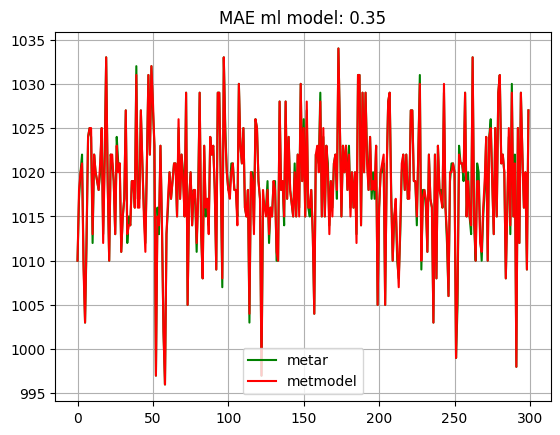

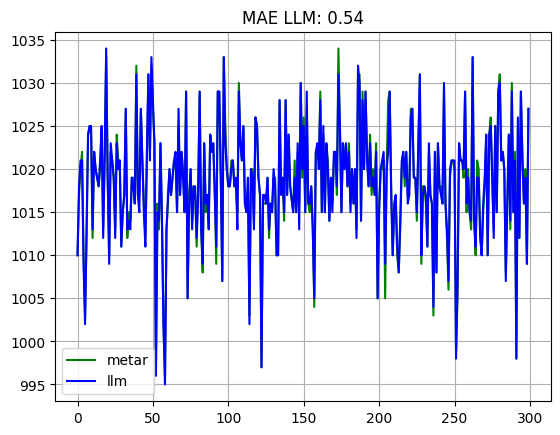

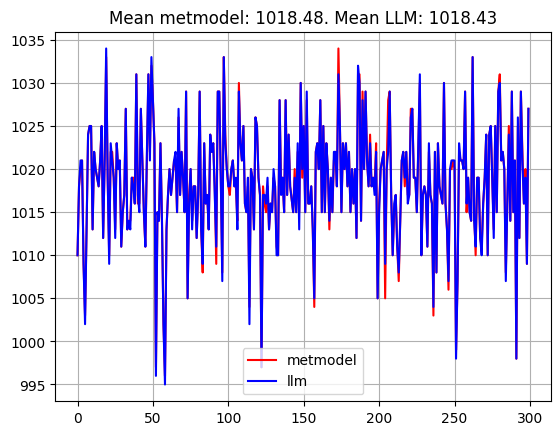

In [3]:
#@title QNH check

import pandas as pd
import numpy as np
pd.options.display.max_rows = 999

score = []

def flatten_list(list_s):
  numbers = []
  for sublist in list_s:
      for item in sublist:
          # Check if the string after 'q' is not empty
          if len(item) > 1:
              num = item[1:]
              if num.isdigit():
                  numbers.append(int(num))


  return np.array(numbers)

df = pd.read_csv(result_path)
q_ytest = []
q_ypred = []
q_metmod =[]
for i in range(0,len(df)):
  q_ytest.append([word for word in df["y_test"][i].split() if 'q' in word.lower()])
  q_ypred.append([word for word in df["y_pred"][i].split() if 'q' in word.lower()][:1])
  q_metmod.append([word for word in df["all"][i].split() if 'q' in word.lower()][:1])

q_ypred_f = []

for sublist in q_ypred:
    if not sublist:  # Check if the sublist is empty
        q_ypred_f.append(["q0000"])
    else:
        q_ypred_f.append(sublist)  # Append the single string element


q_ypred_n = flatten_list(q_ypred_f)
q_test_n = flatten_list(q_ytest)
q_metmod_n = flatten_list(q_metmod)


#Show results
df_res = pd.DataFrame({"metar":q_test_n,"metmodel":q_metmod_n,"llm":q_ypred_n})

#avoid 0
df_res = df_res[df_res.llm!=0]
mae_llm = round((df_res['metar'] - df_res['llm']).abs().mean(),2)
mae_metmod = round(np.mean(np.abs(q_metmod_n - q_test_n)),2)

score.append(mae_llm)
score.append(mae_metmod)

df_res[["metar","metmodel"]].plot(grid=True, color=['green', 'red'],title="MAE ml model: {}".format(mae_metmod));
df_res[["metar","llm"]].plot(grid=True, color=['green', 'blue'],title="MAE LLM: {}".format(mae_llm));
df_res[["metmodel","llm"]].plot(grid=True, color=['red', 'blue'],title="Mean metmodel: {}. Mean LLM: {}".format(round(q_metmod_n.mean(),2),round(df_res.llm.mean(),2)));

In [4]:
#@title wind check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 999

def contains_vrb(column):
    return column.str.contains('VRB', case=False, na=False)

def detect_wind_variation_test(metar):
    # Define a regex pattern for wind direction variation
    wind_variation_pattern = r'\b(\d{3})V(\d{3})\b'

    # Search for the wind direction variation in the METAR report
    match = re.search(wind_variation_pattern, metar)
    if match:
        dir1 = match.group(1)
        dir2 = match.group(2)
        return dir1,dir2
    else:
        return -1,-1

def detect_wind_variation_llm(metar):
    # Define a regex pattern for wind direction variation
    wind_variation_pattern = r'\b(\d{3})v(\d{3})\b'

    # Search for the wind direction variation in the METAR report
    match = re.search(wind_variation_pattern, metar)
    if match:
        dir1 = match.group(1)
        dir2 = match.group(2)
        return dir1,dir2
    else:
        return -1,-1


# Function to extract wind direction, speed, and gusts
def extract_wind_llm(metar):
    # Define a regex pattern for wind direction, intensity, and gusts
    # Also include a pattern for variable wind direction (VRB)
    wind_pattern = r'\b(vrb|\d{3})(\d{2})(g\d{2})?kt\b'

    # Search for the wind information in the METAR report
    match = re.search(wind_pattern, metar)
    if match:
        wind_direction = match.group(1)
        wind_speed = match.group(2)
        wind_gust = match.group(3) if match.group(3) else 0
        return wind_direction, wind_speed, wind_gust
    else:
        return "Wind information not found"


def extract_wind_test(metar):
    # Define a regex pattern for wind direction, intensity, and gusts
    # Also include a pattern for variable wind direction (VRB)
    wind_pattern = r'\b(VRB|\d{3})(\d{2})(G\d{2})?KT\b'

    # Search for the wind information in the METAR report
    match = re.search(wind_pattern, metar)
    if match:
        wind_direction = match.group(1)
        wind_speed = match.group(2)
        wind_gust = match.group(3) if match.group(3) else 0
        return wind_direction, wind_speed, wind_gust
    else:
        return "Wind information not found"

dirtest, modtest, gtest =[],[],[]
dirllm, modllm, gllm =[],[],[]

df = pd.read_csv(result_path)

for i in range(0,len(df)):
  wind_info_test = extract_wind_test(df["y_test"][i])
  wind_info_llm = extract_wind_llm(df["y_pred"][i])

  if isinstance(wind_info_test, tuple):
    dir, mod, gust = wind_info_test
    dirtest.append(dir)
    modtest.append(mod)
    gtest.append(gust)

  else:
    print(wind_info_test)
    dirtest.append(np.nan)
    modtest.append(np.nan)
    gtest.append(np.nan)

  if isinstance(wind_info_llm, tuple):
    dir, mod, gust = wind_info_llm
    dirllm.append(dir)
    modllm.append(mod)
    gllm.append(gust)

  else:
    print(wind_info_llm,i)
    dirllm.append(np.nan)
    modllm.append(np.nan)
    gllm.append(np.nan)

df["dirtest"]=dirtest
df["modtest"]=modtest
df["gtest"]=gtest

df["dirllm"]=dirllm
df["modllm"]=modllm
df["gllm"]=gllm

for i in range(0,len(df)):
  if "G" in str(df['gtest'][i]):
    df["gtest"][i]= int(df['gtest'][i][1:])

for i in range(0,len(df)):
  if "g" in str(df['gllm'][i]):
    df["gllm"][i]= int(df['gllm'][i][1:])

dirmetmod =[]
for i in range(0,len(df)):
  dirmetmod.append(int(df["all"][i].split()[0][:3]))
df["dirmetmod"] = dirmetmod

modmetmod =[]
for i in range(0,len(df)):
  modmetmod.append(int(df["all"][i].split()[0][3:5]))
df["modmetmod"] = modmetmod

dirvar = []
for i in range(0,len(df)):
  dirvar.append(detect_wind_variation_test(df["y_test"][i]))
df["dirvartest"] = dirvar

dirvar = []
for i in range(0,len(df)):
  dirvar.append(detect_wind_variation_llm(df["y_pred"][i]))
df["dirvarllm"] = dirvar
df.set_index("time")

#Analytics
mask_dirtest = contains_vrb(df['dirtest'])
mask_dirllm = contains_vrb(df['dirllm'])

# Combine the masks to filter rows
df_dir = df[~(mask_dirtest | mask_dirllm)][["dirtest","dirllm","dirmetmod"]].dropna().astype(int)

mae = int(np.mean(np.abs(df_dir['dirtest'] - df_dir['dirmetmod'])))
print(f"Mean Absolute Error (degrees) wind direction metmodel and metar: {mae}")
score.append(mae)
#MAE dir no vrb llm metar
mae = int((np.mean(np.abs(df_dir['dirtest'] - df_dir['dirllm']))))
print(f"Mean Absolute Error (degrees) wind direction llm and metar: {mae}")
score.append(mae)
df_mod= df[['modmetmod',"modtest","modllm"]].dropna().astype(int)

mae = round(np.mean(np.abs(df_mod['modtest'] - df_mod['modmetmod'])),2)
print(f"Mean Absolute Error (Kt) wind intensity metmodel and metar: {mae}")
score.append(mae)

#MAE dir no vrb llm metar
mae = round(np.mean(np.abs(df_mod['modtest'] - df_mod['modllm'])),2)
print(f"Mean Absolute Error (kt) wind intensity llm and metar: {mae}")
score.append(mae)

dirvary = sum([1 if (df["dirvarllm"][c][0]!=-1) & (df["dirvartest"][c][0]!=-1) else 0 for c in range(0,len(df))])
dirvarn = sum([1 if (df["dirvarllm"][c][0]==-1) & (df["dirvartest"][c][0]==-1) else 0 for c in range(0,len(df))])
print("Both metar and forecast direction variation:", round(dirvary/len(df),2))
print("Both metar and forecast no direction variation:",round(dirvarn/len(df),2))
print("No match between metar and forecast:", round((len(df)-dirvary-dirvarn)/len(df),2))

display(df.set_index("time")[["dirtest","dirllm","dirmetmod","dirvartest","dirvarllm", "modtest",	"modmetmod","modllm","gtest","gllm"]].head(20))

Wind information not found 56
Wind information not found 102
Wind information not found 264
Mean Absolute Error (degrees) wind direction metmodel and metar: 50
Mean Absolute Error (degrees) wind direction llm and metar: 52
Mean Absolute Error (Kt) wind intensity metmodel and metar: 3.84
Mean Absolute Error (kt) wind intensity llm and metar: 2.19
Both metar and forecast direction variation: 0.53
Both metar and forecast no direction variation: 0.2
No match between metar and forecast: 0.27


,dirtest,dirllm,dirmetmod,dirvartest,dirvarllm,modtest,modmetmod,modllm,gtest,gllm
time,,,,,,,,,,
2022-03-13 14:00:00,210,190,200,"(180, 260)","(-1, -1)",12,17,13,23,0
2022-08-01 21:00:00,030,090,50,"(350, 090)","(010, 160)",04,7,05,0,0
2019-07-22 08:00:00,060,050,30,"(010, 120)","(010, 100)",04,9,03,0,0
2022-10-05 01:00:00,160,000,140,"(-1, -1)","(-1, -1)",05,3,00,0,0
2020-04-01 05:00:00,000,000,70,"(-1, -1)","(-1, -1)",00,3,00,0,0
2022-12-16 02:00:00,VRB,090,60,"(-1, -1)","(050, 130)",02,7,04,0,0
2018-10-09 08:00:00,VRB,140,100,"(-1, -1)","(-1, -1)",02,5,04,0,0
2019-09-04 13:00:00,030,030,20,"(350, 080)","(350, 080)",13,19,14,0,24
2021-12-14 22:00:00,100,140,100,"(-1, -1)","(-1, -1)",02,5,02,0,0


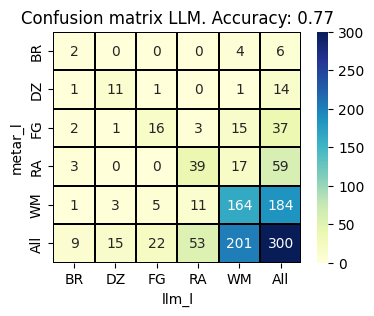

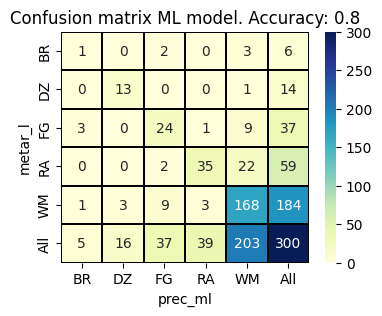

In [5]:
#@title wx check

from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
df = pd.read_csv(result_path)

#label br/fg if weather code contains FG or BR
df["metar_l"] = "WM"
mask = df['y_test'].str.contains("BR")
df.loc[mask,["metar_l"]] = "BR"
mask = df['y_test'].str.contains("FG")
df.loc[mask,["metar_l"]] = "FG"
mask = df['y_test'].str.contains("DZ")
df.loc[mask,["metar_l"]] = "DZ"
mask = df['y_test'].str.contains("RA")
df.loc[mask,["metar_l"]] = "RA"

df["llm_l"] = "WM"
mask = df['y_pred'].str.contains("br")
df.loc[mask,["llm_l"]] = "BR"
mask = df['y_pred'].str.contains("fg")
df.loc[mask,["llm_l"]] = "FG"
mask = df['y_pred'].str.contains("dz")
df.loc[mask,["llm_l"]] = "DZ"
mask = df['y_pred'].str.contains("ra")
df.loc[mask,["llm_l"]] = "RA"



prec_ml =[]
for i in range(0,len(df["all"])):
  prec_ml.append(df["all"][i].split()[2])
df["prec_ml"] = prec_ml


# Confussion matrix and Heidke skill score
cm0 = pd.crosstab(df.metar_l, df.llm_l,margins=True)

ac0 = round(accuracy_score(df.metar_l,df.llm_l),2)
score.append(ac0)

cm1 = pd.crosstab(df.metar_l, df.prec_ml,margins=True)
ac1 = round(accuracy_score(df.metar_l,df.prec_ml),2)
score.append(ac1)



plt.figure(figsize=(4, 3))
plt.title("Confusion matrix LLM. Accuracy: {}".format(ac0))
seab0 = sns.heatmap(cm0,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix ML model. Accuracy: {}".format(ac1))
seab1 = sns.heatmap(cm1,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()


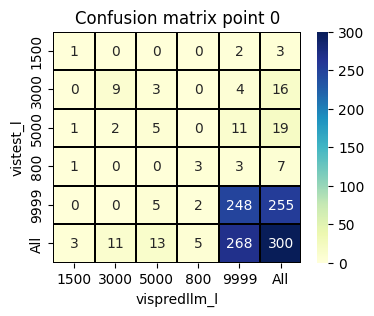


Quality report LLM model
              precision    recall  f1-score     support
1500           0.333333  0.333333  0.333333    3.000000
3000           0.818182  0.562500  0.666667   16.000000
5000           0.384615  0.263158  0.312500   19.000000
800            0.600000  0.428571  0.500000    7.000000
9999           0.925373  0.972549  0.948375  255.000000
accuracy       0.886667  0.886667  0.886667    0.886667
macro avg      0.612301  0.512022  0.552175  300.000000
weighted avg   0.871896  0.886667  0.876466  300.000000
accuracy: 0.8866666666666667


In [6]:
#@title Visibility check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

pd.options.display.max_rows = 999

def extract_visibility(metar):
    # Check if 'CAVOK' is in the METAR report
    if 'CAVOK' in metar:
        return 9999
    if "cavok" in metar:
        return 9999
    # Define a regex pattern for visibility
    visibility_pattern = r'\b(\d{4}|(\d+/\d+)?SM)\b'

    # Search for the visibility in the METAR report
    match = re.search(visibility_pattern, metar)
    if match:
        return int(match.group(0))
    else:
        return "Visibility information not found"

df = pd.read_csv(result_path)

vistest = []
vispred = []
for i in range(0,len(df)):
  vistest.append(extract_visibility(df["y_test"][i]))
  vispred.append(extract_visibility(df["y_pred"][i]))

df["vistest"]= vistest
df["vispred"]= vispred
df[['y_test', 'y_pred', 'all', 'vistest', 'vispred']]


#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,800), (800, 1500),(1500,3000),(3000,5000),(5000,100000)])
labels = ['800', '1500',"3000","5000","9999"]

df["vistest_l"] = pd.cut(df["vistest"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df["vispredllm_l"] = pd.cut(df["vispred"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df =df.dropna()
cm0 = pd.crosstab(df.vistest_l, df.vispredllm_l,margins=True)

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 0")
seab0 = sns.heatmap(cm0,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()

report = classification_report(df.vistest_l,df.vispredllm_l, output_dict=True)

# Convert to DataFrame for easier manipulation (optional)
report_df = pd.DataFrame(report).transpose()

# Extract accuracy
accuracy = report['accuracy']

report = pd.DataFrame(classification_report(df.vistest_l,df.vispredllm_l,output_dict=True)).T
print("\nQuality report LLM model")
print(report)
print("accuracy:",accuracy)
score.append(accuracy)

In [7]:
#@title Temperature check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def extract_temperature_test(metar):
    # Define a regex pattern to match the temperature (TT/DD)
    temperature_pattern = r'\b(M?\d{2})/(M?\d{2})\b'

    # Search for the temperature pattern in the METAR report
    match = re.search(temperature_pattern, metar)
    if match:
        temperature = match.group(1)
        if 'M' in temperature:
            temperature = -int(temperature.replace('M', ''))
        else:
            temperature = int(temperature)
        return temperature
    else:
        return None


def extract_temperature_llm(metar):
    # Define a regex pattern to match the temperature (TT/DD)
    temperature_pattern = r'\b(m?\d{2}) (m?\d{2})\b'

    # Search for the temperature pattern in the METAR report
    match = re.search(temperature_pattern, metar)
    if match:
        temperature = match.group(1)
        if 'm' in temperature:
            temperature = -int(temperature.replace('m', ''))
        else:
            temperature = int(temperature)
        return temperature
    else:
        return None


templlm,tempmetar,tempmetmod, tempmetmodraw =[],[],[],[]
for i in range (0,len(df)):
  tempmetar.append(extract_temperature_test(df["y_test"][i]))
  templlm.append(extract_temperature_llm(df["y_pred"][i]))
  tempmetmodraw.append(df["all"][i].split()[5])

tempmetmod = [-int(temperature.replace('M', '')) if 'M' in temperature else int(temperature) for temperature in tempmetmodraw]
df_temp=pd.DataFrame({"tempmetar":tempmetar,"templlm":templlm,"tempmetmod":tempmetmod}).dropna()


mae = round(np.mean(np.abs(df_temp['tempmetar'] - df_temp['tempmetmod'])),2)
std = round((df_temp['tempmetar'] - df_temp['tempmetmod']).std(),2)
print(f"Mean Absolute Error (degrees) temperature metmodel and metar: {mae}")
print(f"Standard desviation differences (degrees) temperature metmodel and metar: {std}")
score.append(mae)
score.append(std)

#MAE dir no vrb llm metar
mae = round(np.mean(np.abs(df_temp['tempmetar'] - df_temp['templlm'])),2)
std = round((df_temp['tempmetar'] - df_temp['templlm']).std(),2)
print(f"Mean Absolute Error temperature (degreees) llm and metar: {mae}")
print(f"Standard desviation differences (degrees) temperature LLM and metar: {std}")
score.append(mae)
score.append(std)
df_temp.head(20)

Mean Absolute Error (degrees) temperature metmodel and metar: 0.72
Standard desviation differences (degrees) temperature metmodel and metar: 1.07
Mean Absolute Error temperature (degreees) llm and metar: 1.05
Standard desviation differences (degrees) temperature LLM and metar: 1.61


,tempmetar,templlm,tempmetmod
0,8,7.0,7
1,22,23.0,23
2,19,17.0,18
3,13,12.0,12
4,6,4.0,6
5,9,9.0,9
6,14,14.0,13
7,23,23.0,22
8,9,9.0,8
9,7,8.0,7


In [8]:
#@title Save score

df_score = pd.DataFrame(score,index=["MAE_QNH_llm","MAE_QNH_ml","MAE_dir_metmodel",
                          "MAE_dir_llm","MAE_wind_int_metmodel","MAE_wind_int_llm",
                          "Aaccuracy_wx_llm","Accuracy_wx_ML","accuracy_vis_llm","MAE_temp_ml","Std_temp_diff_ml",
                          "MAE_temp_llm","Std_temp_diff_llm"], columns=["Score"])
score_path = "/content/drive/MyDrive/Colab Notebooks/gpt/i+d/mlscore.csv"
df_score.to_csv(score_path)

In [9]:
df_score

,Score
MAE_QNH_llm,0.540000
MAE_QNH_ml,0.350000
MAE_dir_metmodel,50.000000
MAE_dir_llm,52.000000
MAE_wind_int_metmodel,3.840000
MAE_wind_int_llm,2.190000
Aaccuracy_wx_llm,0.770000
Accuracy_wx_ML,0.800000
accuracy_vis_llm,0.886667
MAE_temp_ml,0.720000
